# csv Creation - Contiguous

Creation of a csv containing Gini indices for each state and their respective demographics.

To be sent to Dr. Irish.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('data/contiguous_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                            NAME  \
0     0  US01089011021    Census Tract 110.21, Madison County, Alabama   
1     1  US01095031200      Census Tract 312, Marshall County, Alabama   
2     2  US01073012401  Census Tract 124.01, Jefferson County, Alabama   
3     3  US01073003400      Census Tract 34, Jefferson County, Alabama   
4     4  US01073010402  Census Tract 104.02, Jefferson County, Alabama   

   pop_total  pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov  \
0     5297.0     2762.0     1484.0      346.0     358.0     92.0      5205.0   
1     5727.0     4197.0       63.0       22.0    1089.0   1632.0      4095.0   
2     3660.0      208.0     3325.0        3.0      62.0    142.0      3518.0   
3     1955.0       74.0     1782.0        1.0      36.0    718.0      1237.0   
4     1982.0      337.0     1533.0        0.0      76.0    348.0      1634.0   

     ff_ave  
0  1.705615  
1  1.549508  
2  1.550605  
3  1.640357  
4  2.028916

In [91]:
states = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

df_State_Gini = pd.DataFrame(columns=['State','Gini_total','Gini_white','Gini_black','Gini_asian','Gini_hisp','Gini_pov','Gini_notpov'])

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True)
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white = (0.5 - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/0.5
    Gini_black = (0.5 - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/0.5
    Gini_asian = (0.5 - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/0.5
    Gini_hisp = (0.5 - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/0.5
    Gini_pov = (0.5 - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/0.5
    Gini_notpov = (0.5 - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/0.5

    df_State_Gini = df_State_Gini.append({'State':i,'Gini_total':Gini_total,'Gini_white':Gini_white,'Gini_black':Gini_black,'Gini_asian':Gini_asian,'Gini_hisp':Gini_hisp,'Gini_pov':Gini_pov,'Gini_notpov':Gini_notpov},ignore_index=True)

In [93]:
df_State_Gini.head()

State  Gini_total  Gini_white  Gini_black  Gini_asian  Gini_hisp  \
0     Alabama    0.079497    0.024375    0.234717   -0.020177   0.040312   
1     Arizona    0.165930    0.135606    0.149358    0.114094   0.210278   
2    Arkansas    0.042681    0.018355    0.167934   -0.055991   0.037021   
3  California    0.238219    0.246585    0.252366    0.186156   0.251887   
4    Colorado    0.072956    0.074319    0.046776    0.012285   0.084932   

   Gini_pov  Gini_notpov  
0  0.220881     0.054196  
1  0.261010     0.150646  
2  0.125645     0.027331  
3  0.272130     0.233475  
4  0.137992     0.066188

In [33]:
df_State_Gini.to_csv('State_Gini_Results.csv', index=False)

# csv Creation - Coastal

Creation of a csv containing Gini indices for each state containing coastal counties and their respective demographics.

To be sent to Dr. Irish.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('data/coastal_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                        NAME  pop_total  \
0     1  US01003010100   Census Tract 101, Baldwin County, Alabama     3745.0   
1     2  US01097000500      Census Tract 5, Mobile County, Alabama     1487.0   
2     3  US01097002700     Census Tract 27, Mobile County, Alabama     2251.0   
3     4  US01097004800     Census Tract 48, Mobile County, Alabama      979.0   
4     5  US01097003205  Census Tract 32.05, Mobile County, Alabama     2856.0   

   pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov    ff_ave  
0     2956.0      524.0        3.0      27.0    390.0      3355.0  2.620264  
1       10.0     1415.0        0.0      12.0    659.0       828.0  3.883049  
2      316.0     1815.0        4.0      41.0   1373.0       878.0  2.938244  
3       41.0      892.0        1.0       3.0    525.0       454.0  1.784360  
4      383.0     2069.0      185.0      90.0    809.0      2047.0  1.808333

In [96]:
states = ['Alabama', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Virginia', 'Washington']

df_Coastal_Gini = pd.DataFrame(columns=['Coastal_State','Gini_total','Gini_white','Gini_black','Gini_asian','Gini_hisp','Gini_pov','Gini_notpov'])

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True)
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white = (0.5 - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/0.5
    Gini_black = (0.5 - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/0.5
    Gini_asian = (0.5 - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/0.5
    Gini_hisp = (0.5 - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/0.5
    Gini_pov = (0.5 - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/0.5
    Gini_notpov = (0.5 - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/0.5

    df_Coastal_Gini = df_Coastal_Gini.append({'Coastal_State':i,'Gini_total':Gini_total,'Gini_white':Gini_white,'Gini_black':Gini_black,'Gini_asian':Gini_asian,'Gini_hisp':Gini_hisp,'Gini_pov':Gini_pov,'Gini_notpov':Gini_notpov},ignore_index=True)

In [97]:
df_Coastal_Gini.head()

Coastal_State  Gini_total  Gini_white  Gini_black  Gini_asian  \
0               Alabama    0.146019    0.062417    0.375203    0.199833   
1            California    0.217139    0.211710    0.293134    0.171514   
2           Connecticut    0.125666    0.115728    0.157245    0.114077   
3              Delaware    0.120042    0.131592    0.086128    0.183465   
4  District of Columbia    0.200912    0.187241    0.212675    0.172481   

   Gini_hisp  Gini_pov  Gini_notpov  
0   0.065531  0.296123     0.120193  
1   0.234873  0.276351     0.209722  
2   0.144170  0.199436     0.118348  
3   0.104856  0.094382     0.123172  
4   0.219830  0.248995     0.192431

In [38]:
df_Coastal_Gini.to_csv('Coastal_Gini_Results.csv', index=False)

# Lorenz Curves

Creation of Lorenz Curves for contiguous states and coastal counties from census tract data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/contiguous_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                            NAME  \
0     0  US01089011021    Census Tract 110.21, Madison County, Alabama   
1     1  US01095031200      Census Tract 312, Marshall County, Alabama   
2     2  US01073012401  Census Tract 124.01, Jefferson County, Alabama   
3     3  US01073003400      Census Tract 34, Jefferson County, Alabama   
4     4  US01073010402  Census Tract 104.02, Jefferson County, Alabama   

   pop_total  pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov  \
0     5297.0     2762.0     1484.0      346.0     358.0     92.0      5205.0   
1     5727.0     4197.0       63.0       22.0    1089.0   1632.0      4095.0   
2     3660.0      208.0     3325.0        3.0      62.0    142.0      3518.0   
3     1955.0       74.0     1782.0        1.0      36.0    718.0      1237.0   
4     1982.0      337.0     1533.0        0.0      76.0    348.0      1634.0   

     ff_ave  
0  1.705615  
1  1.549508  
2  1.550605  
3  1.640357  
4  2.028916

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


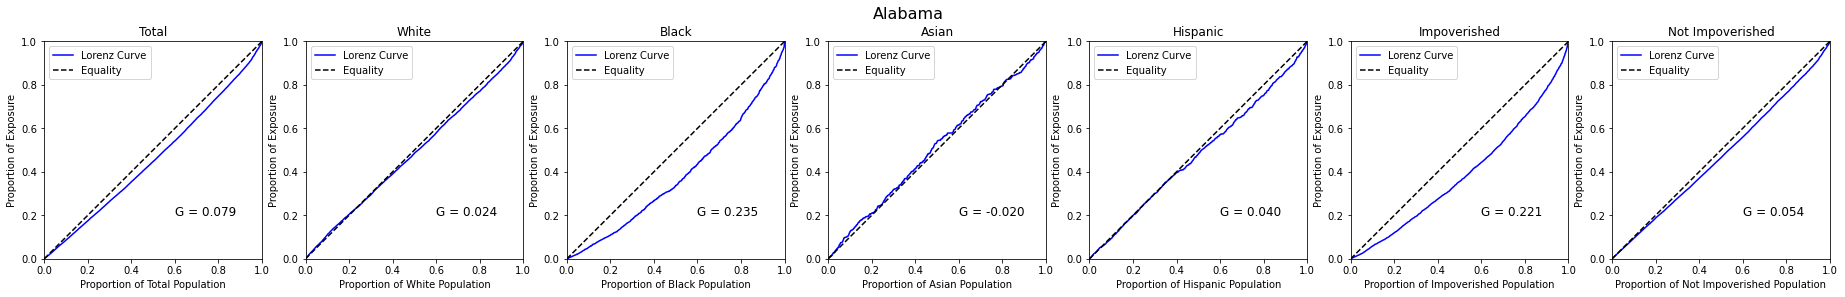

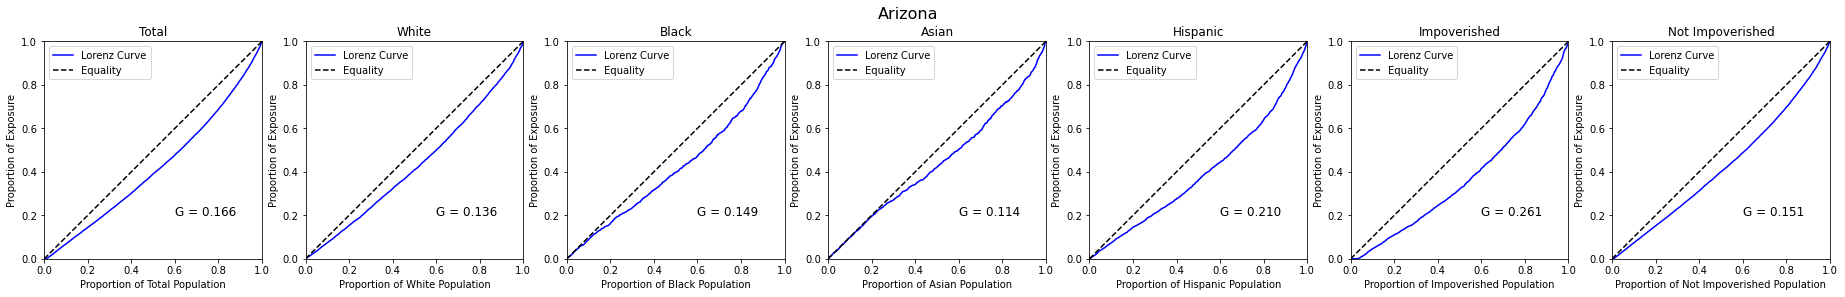

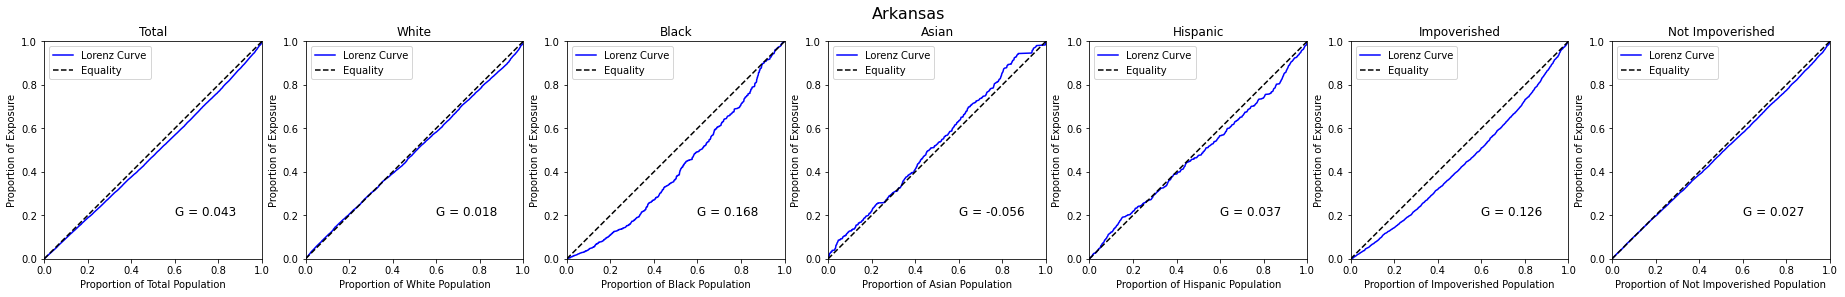

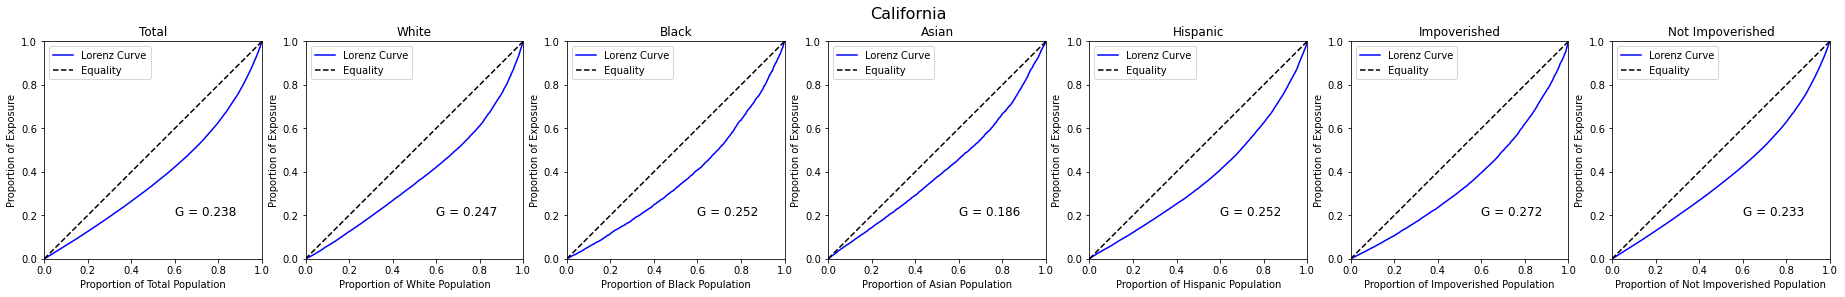

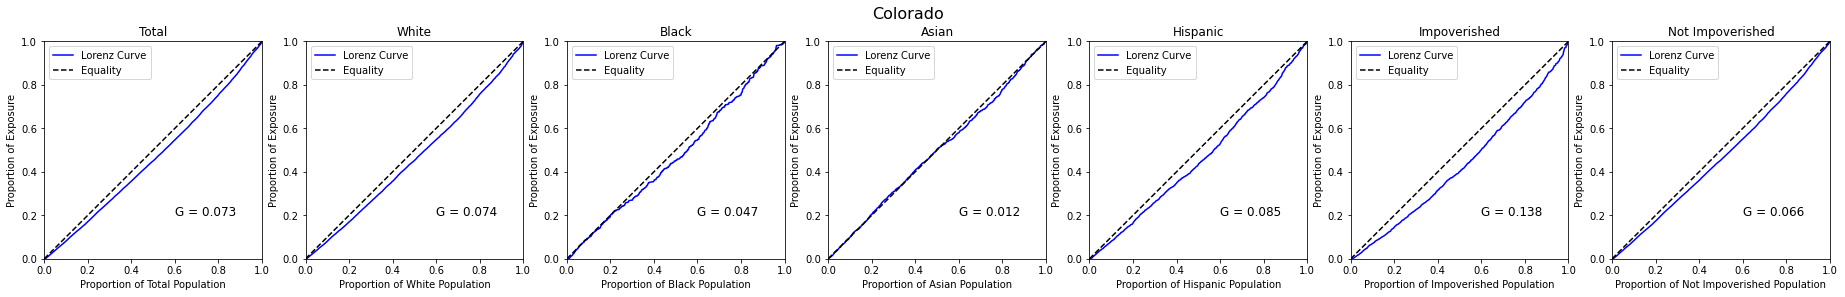

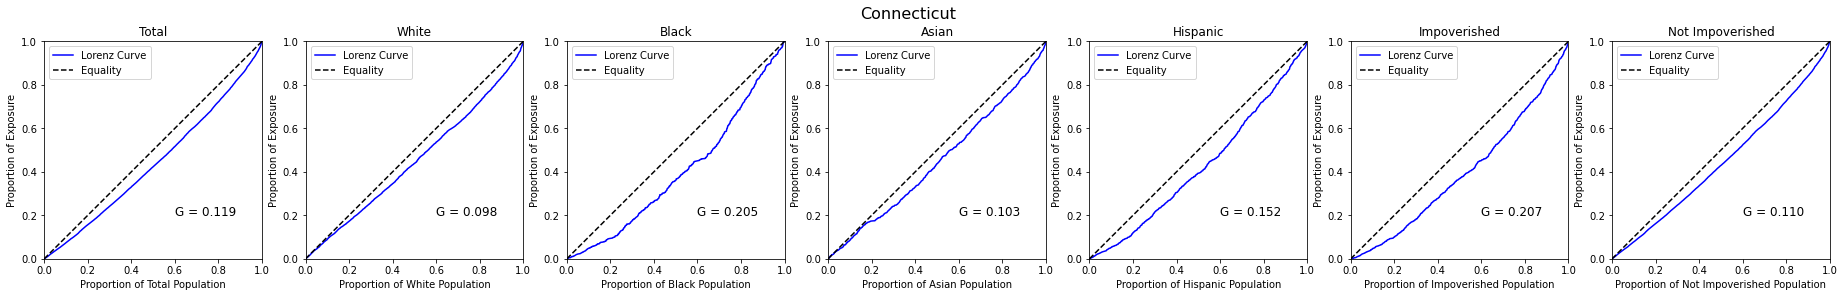

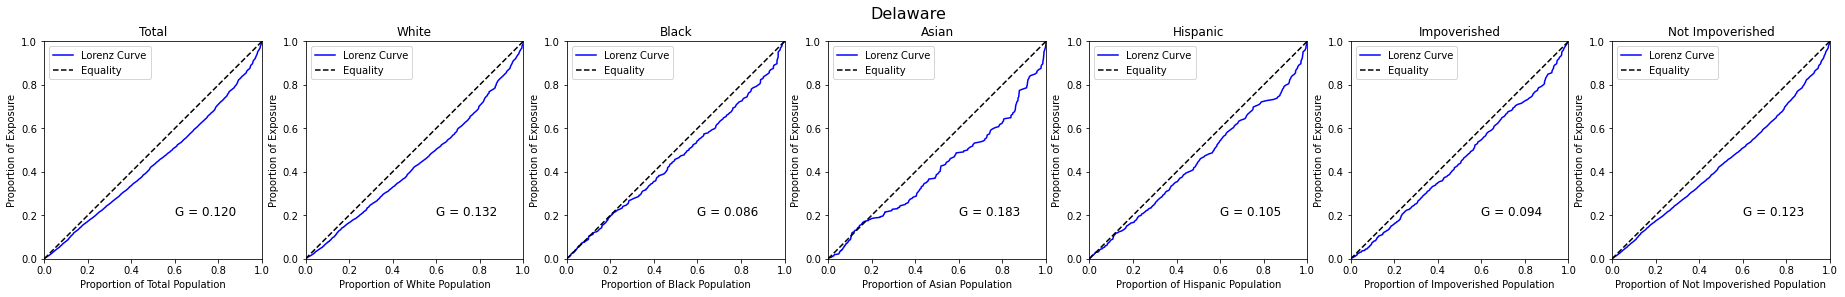

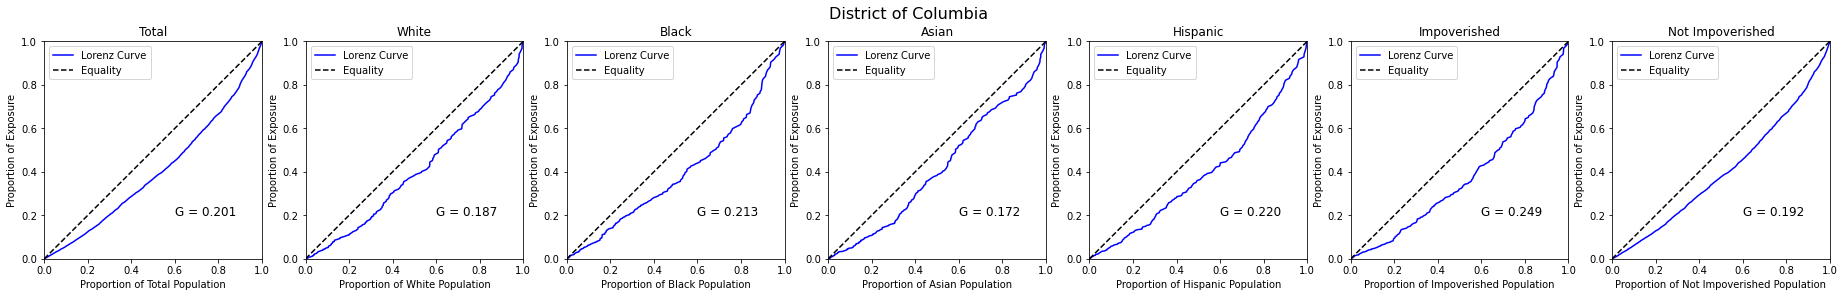

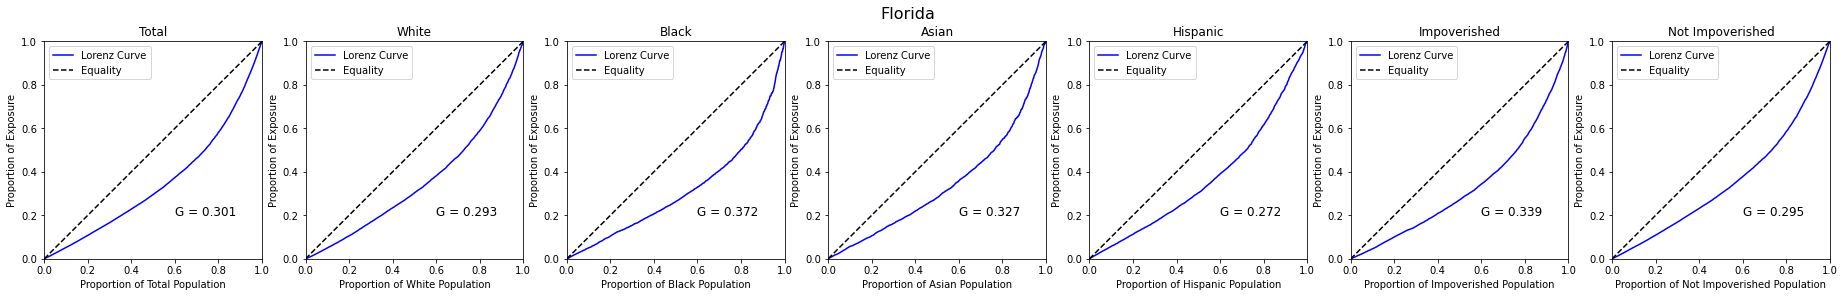

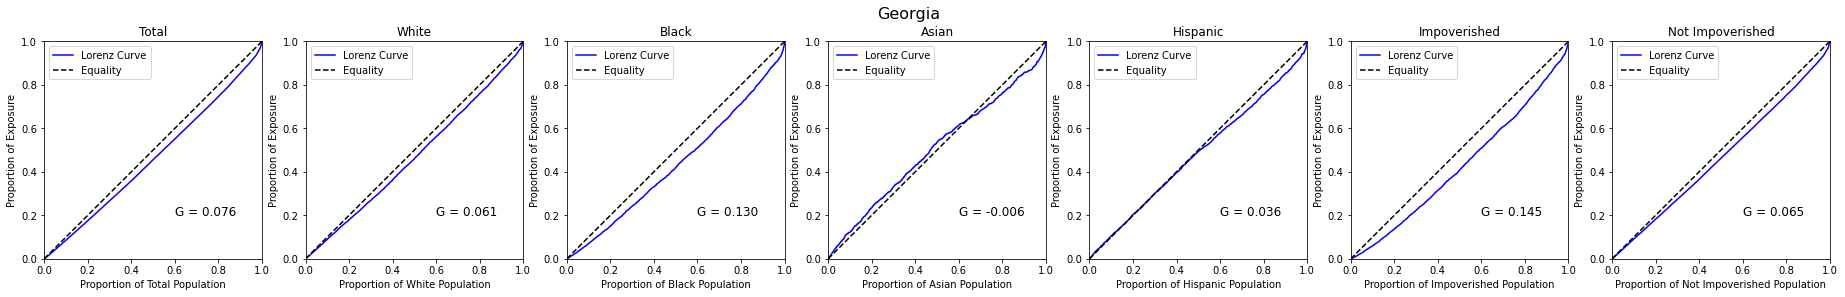

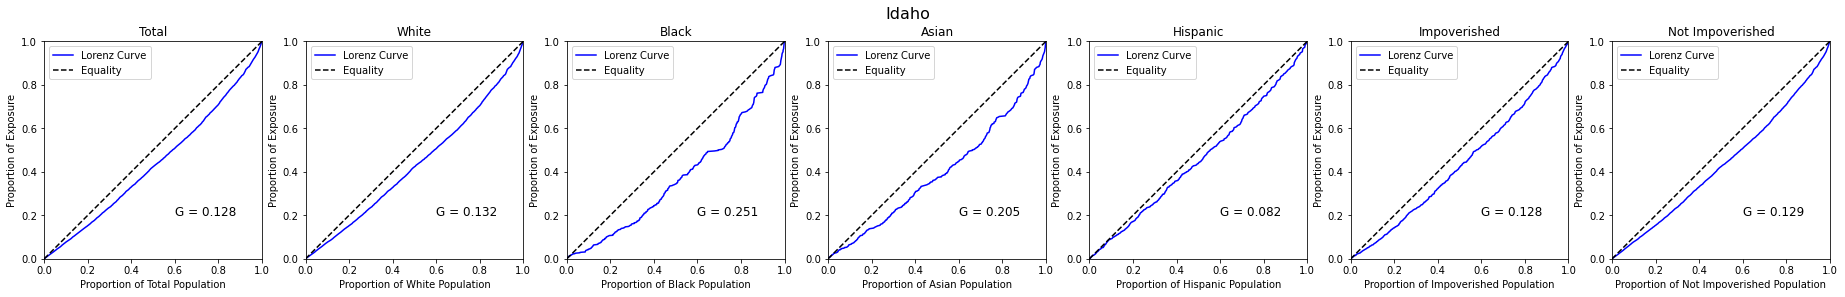

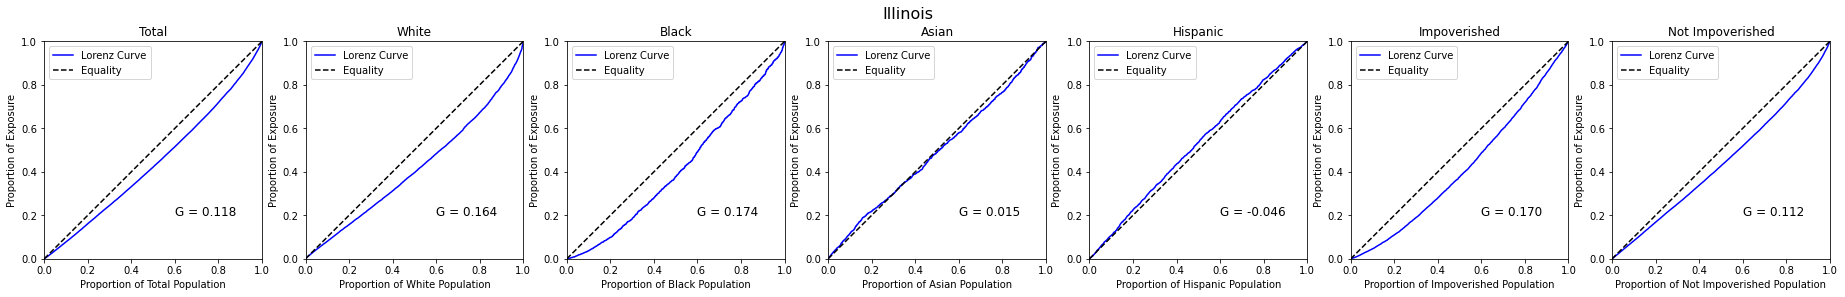

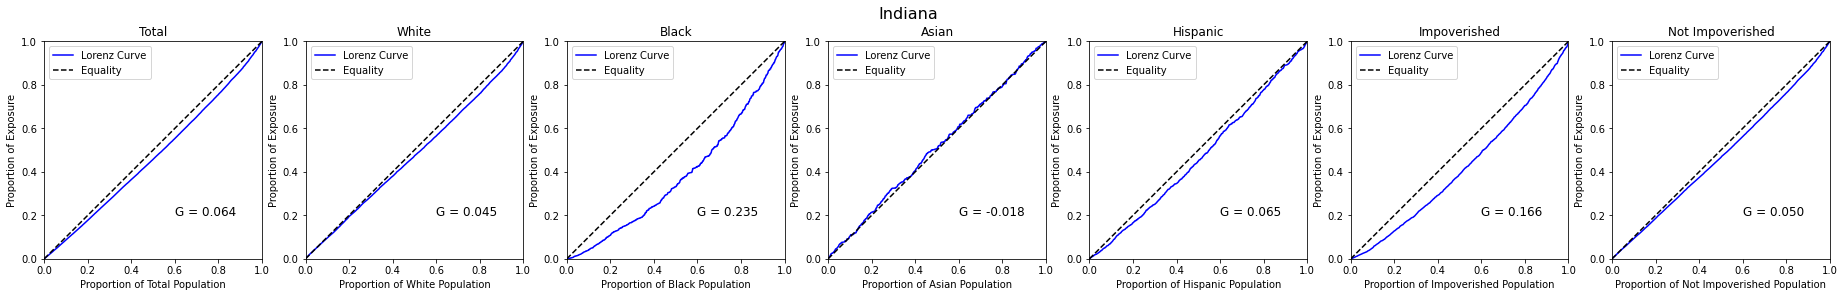

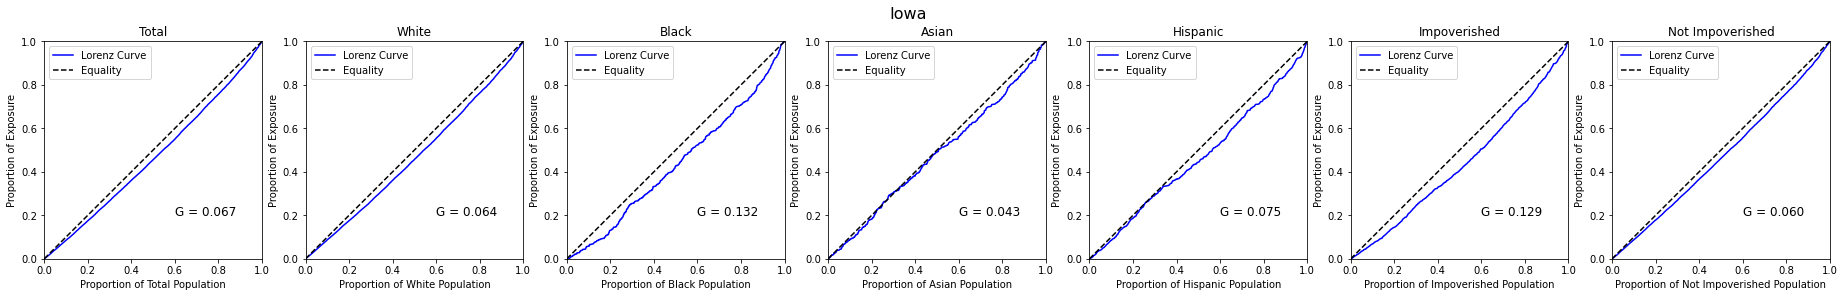

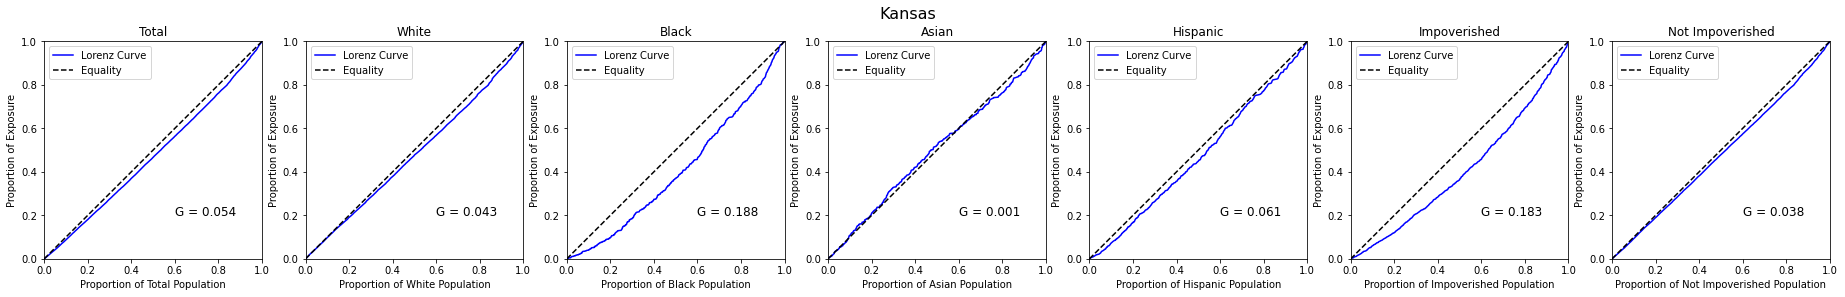

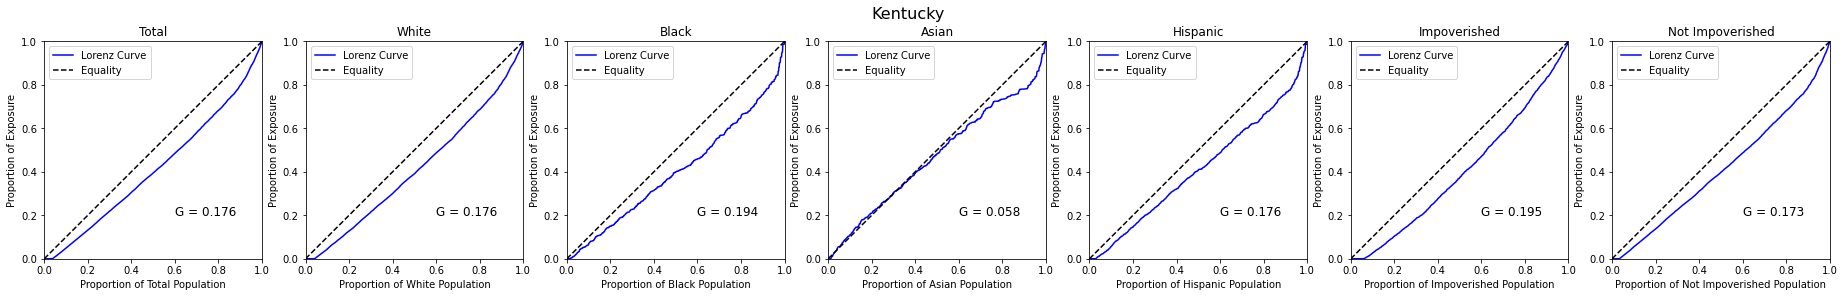

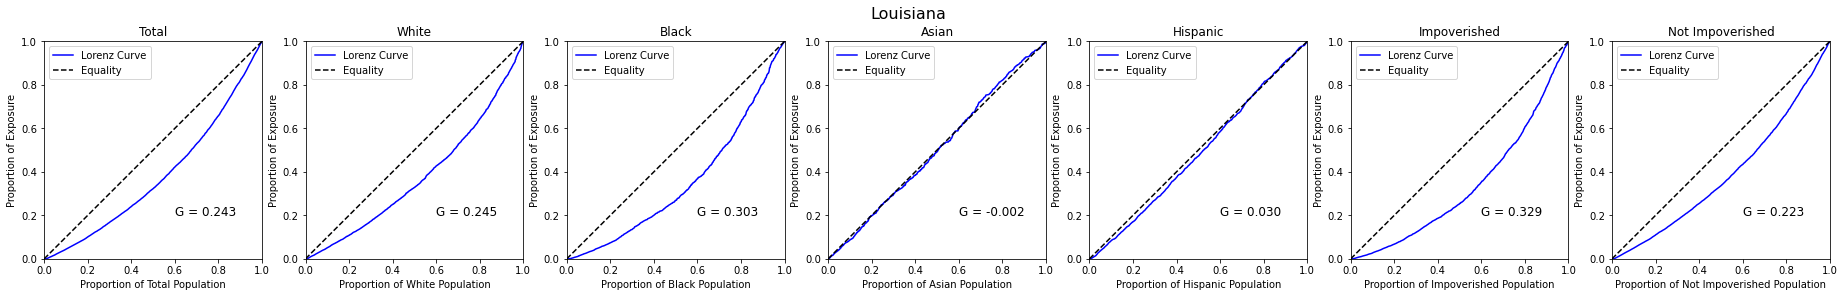

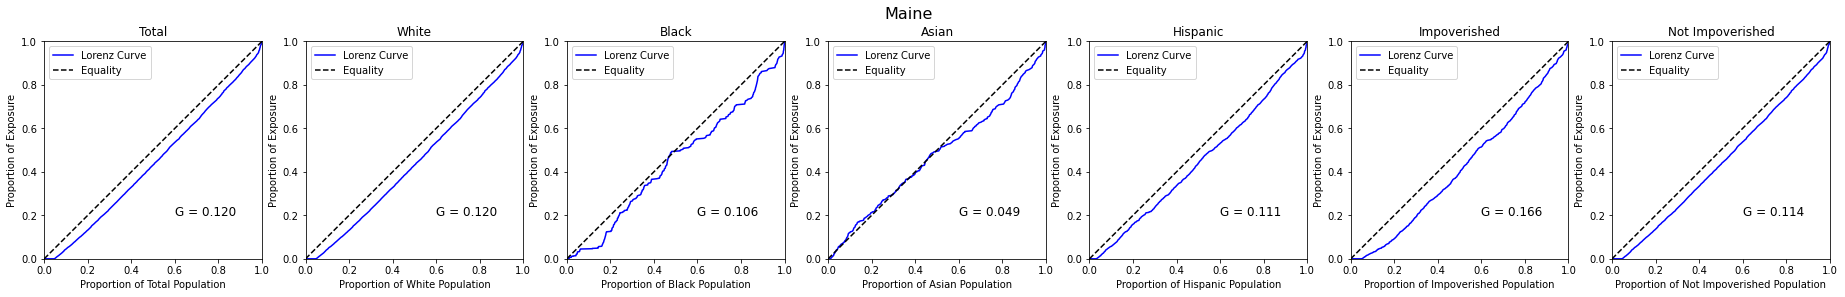

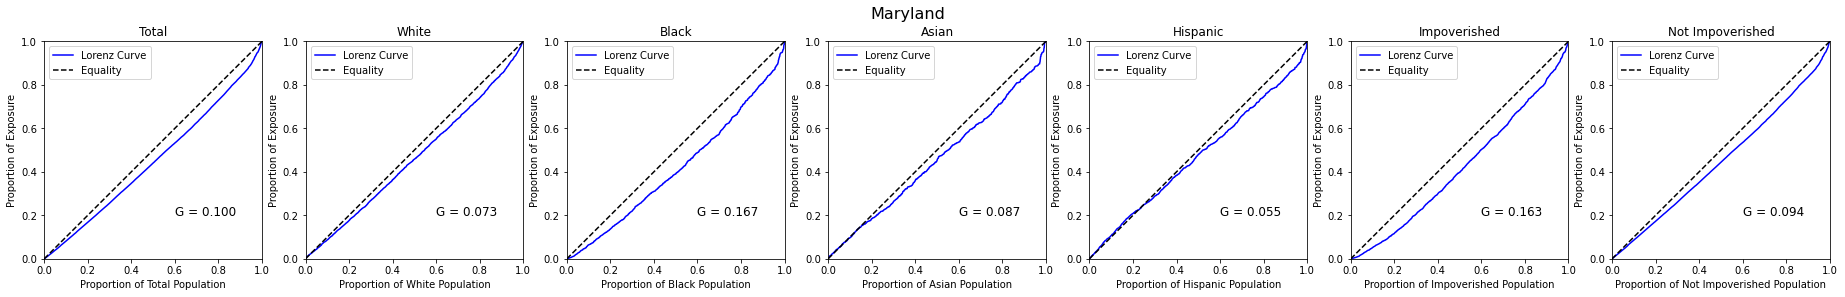

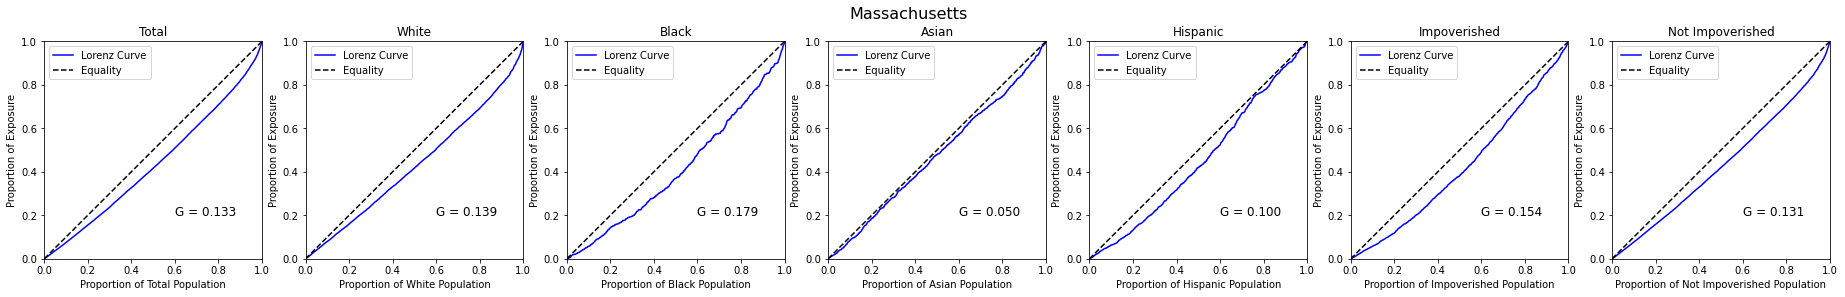

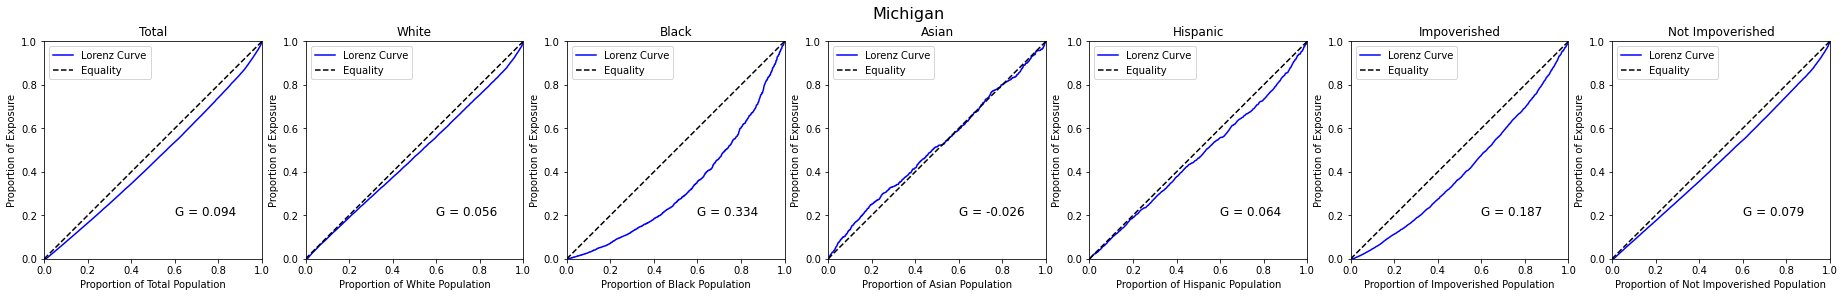

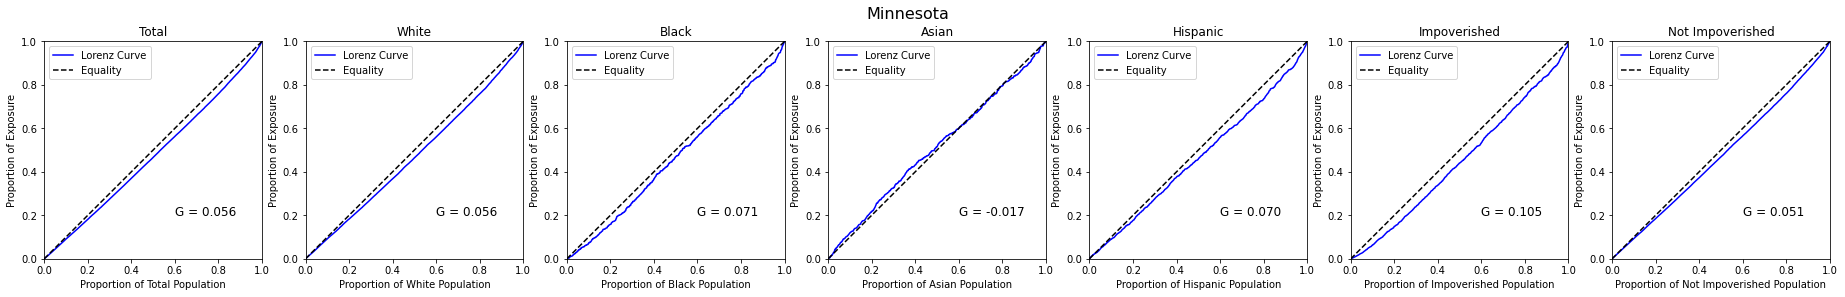

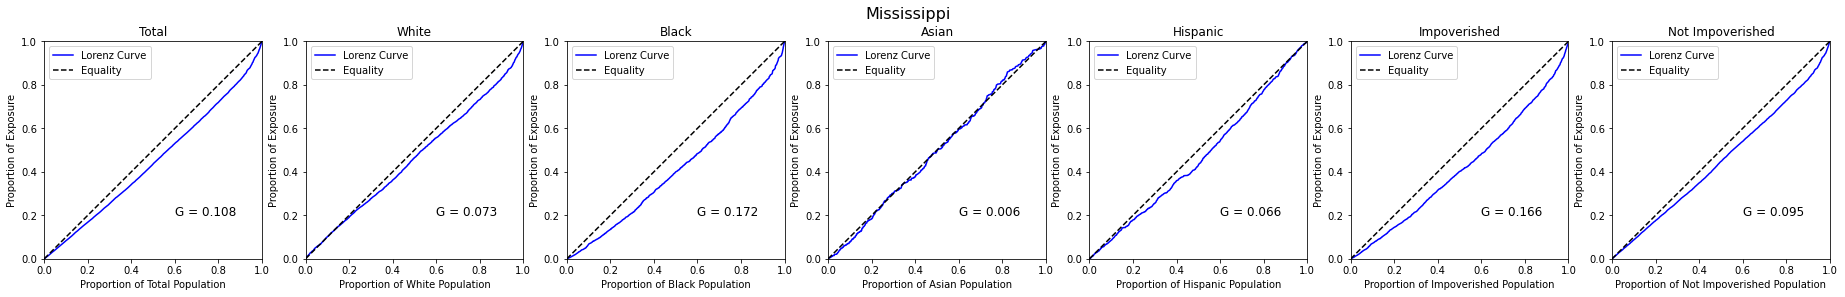

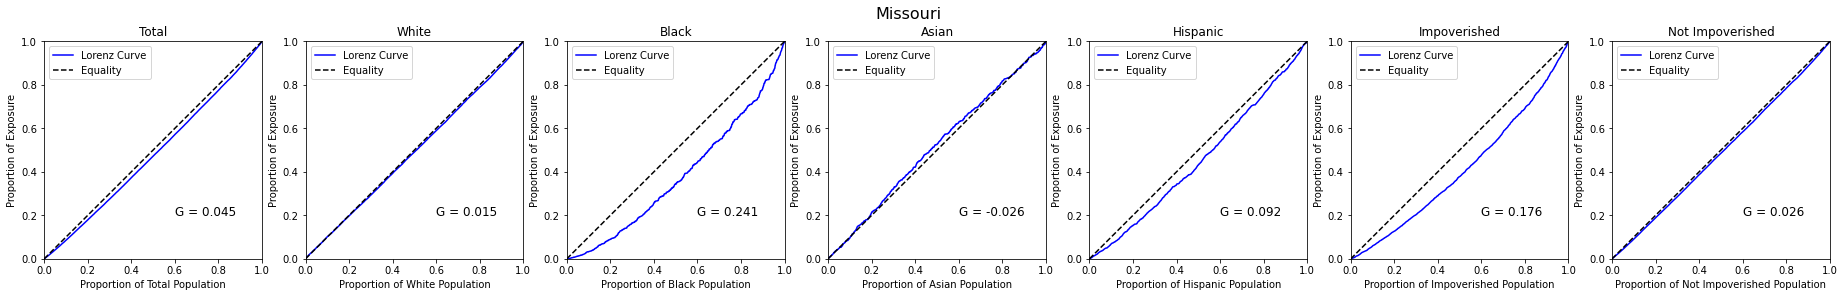

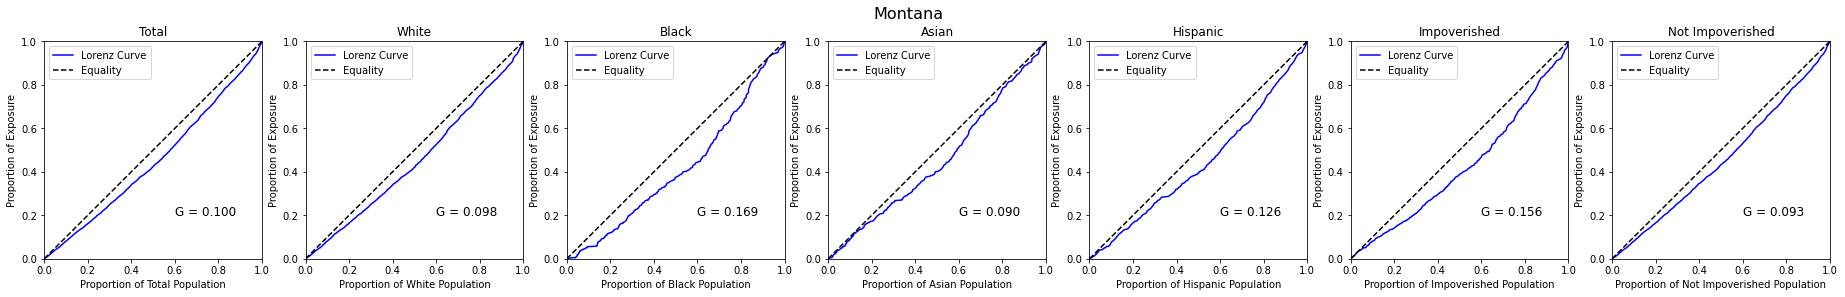

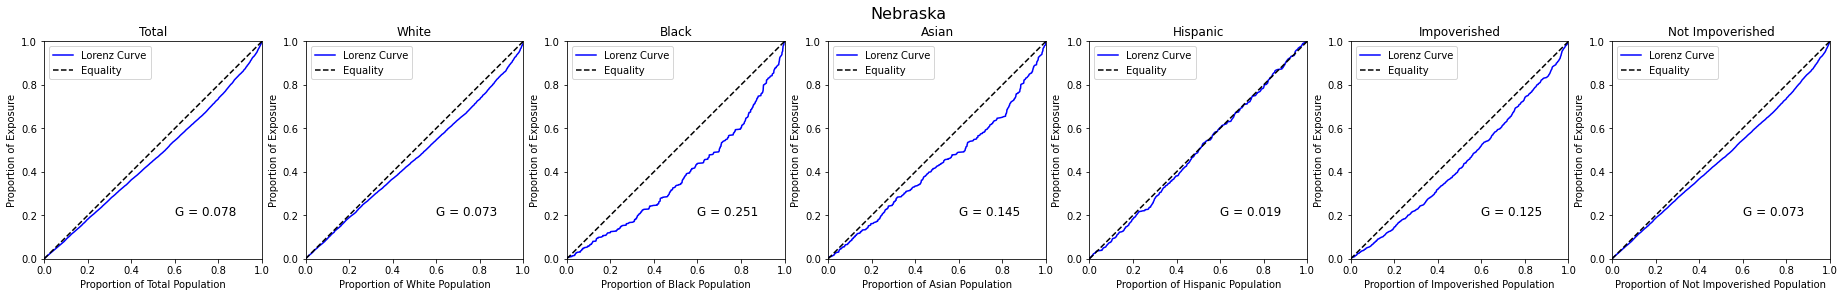

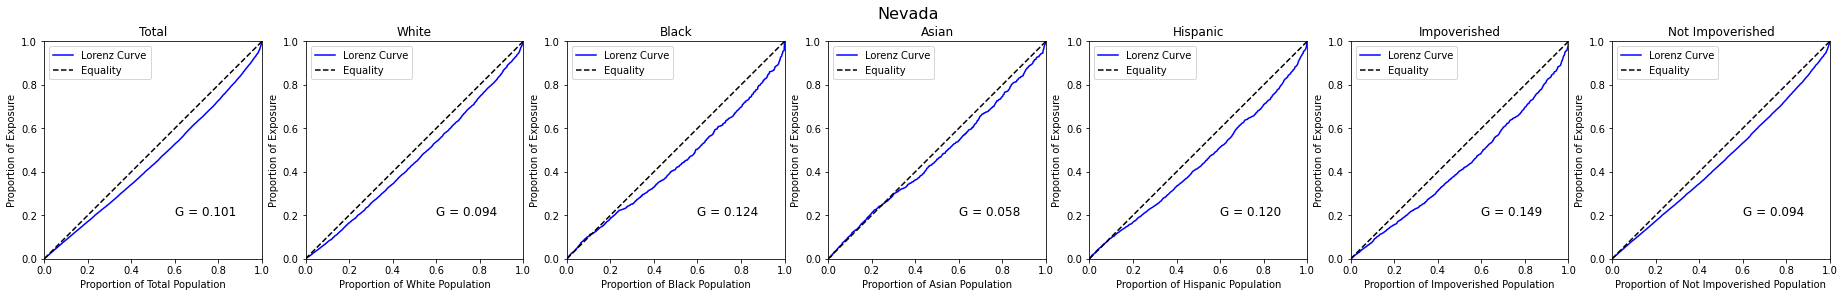

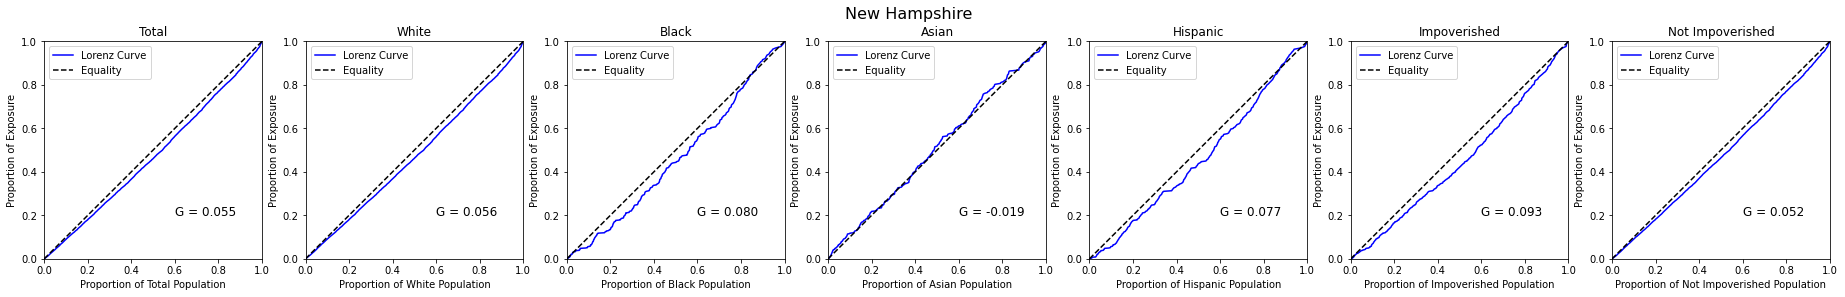

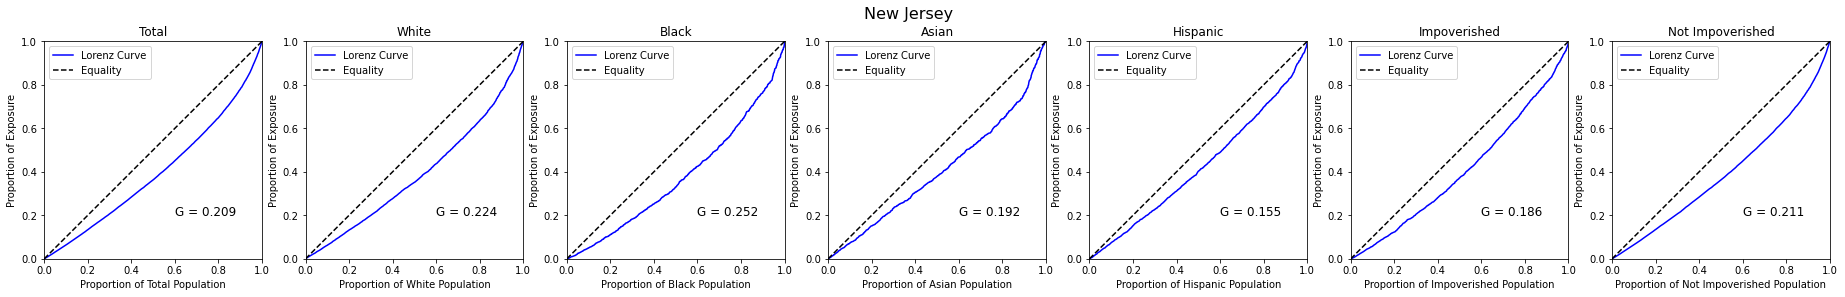

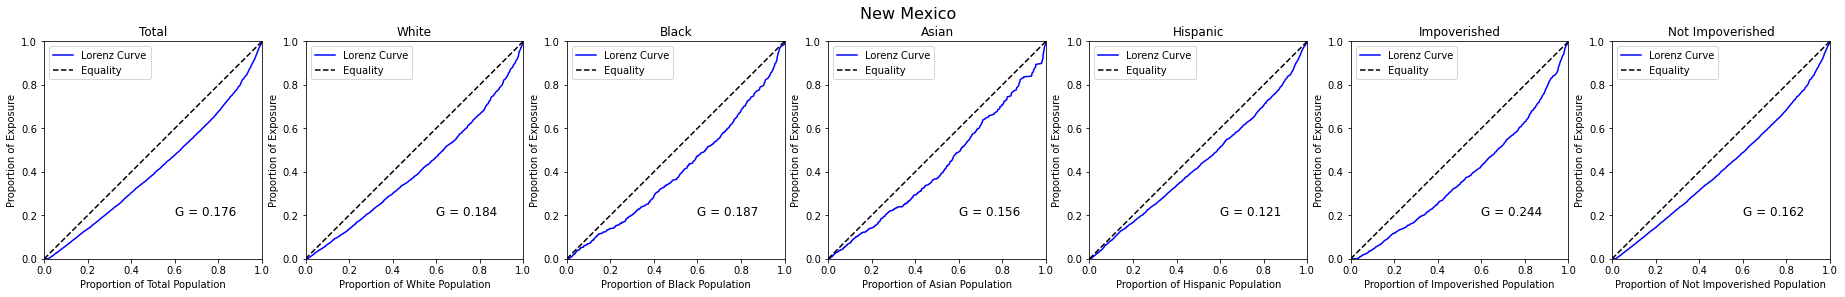

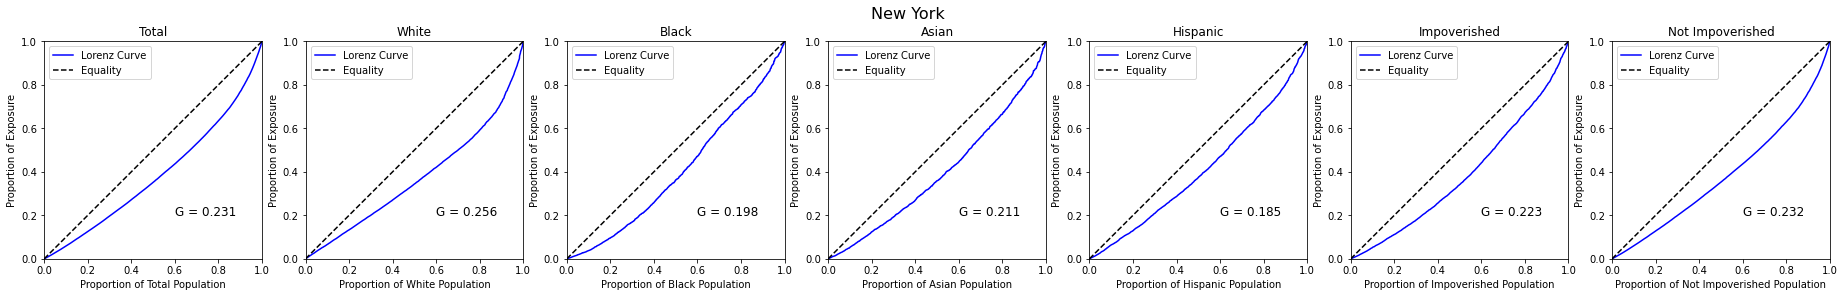

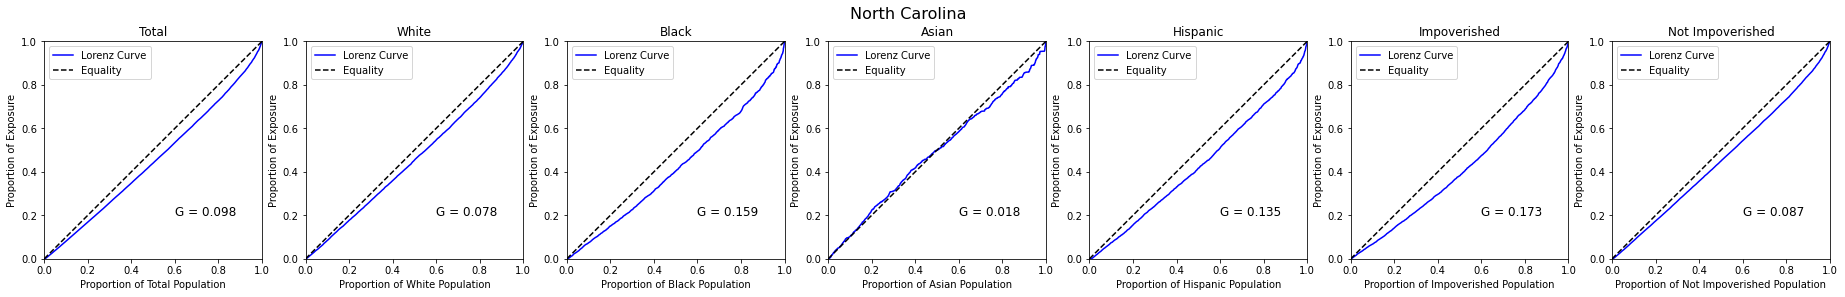

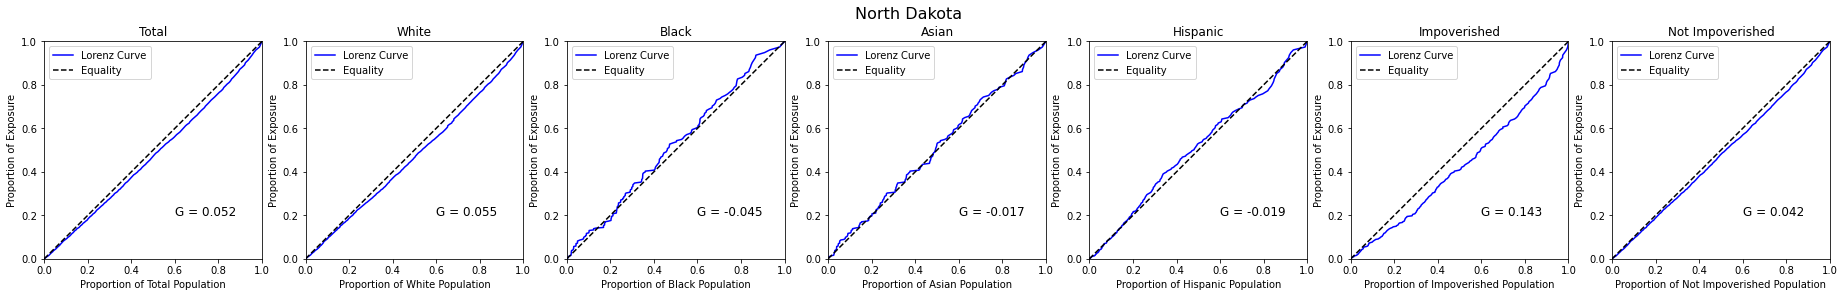

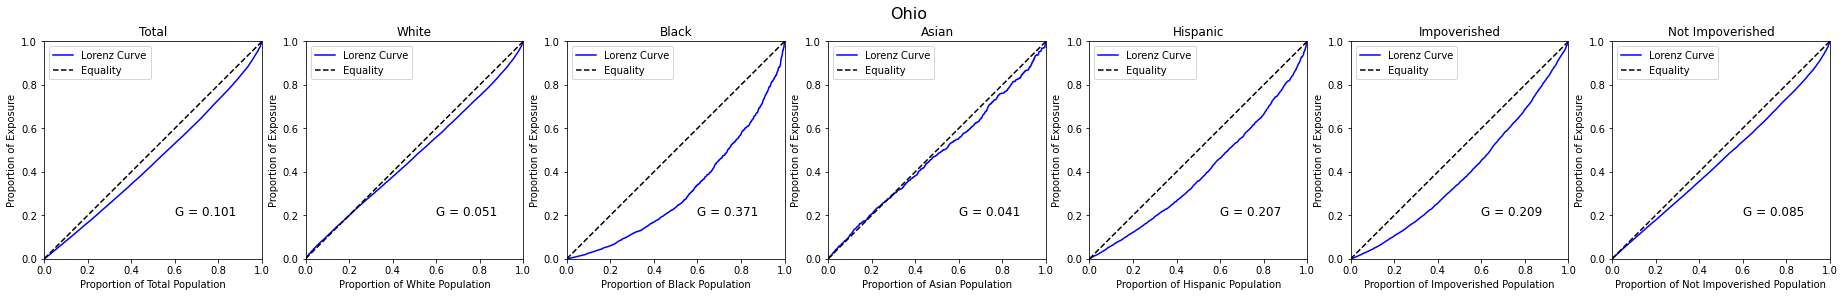

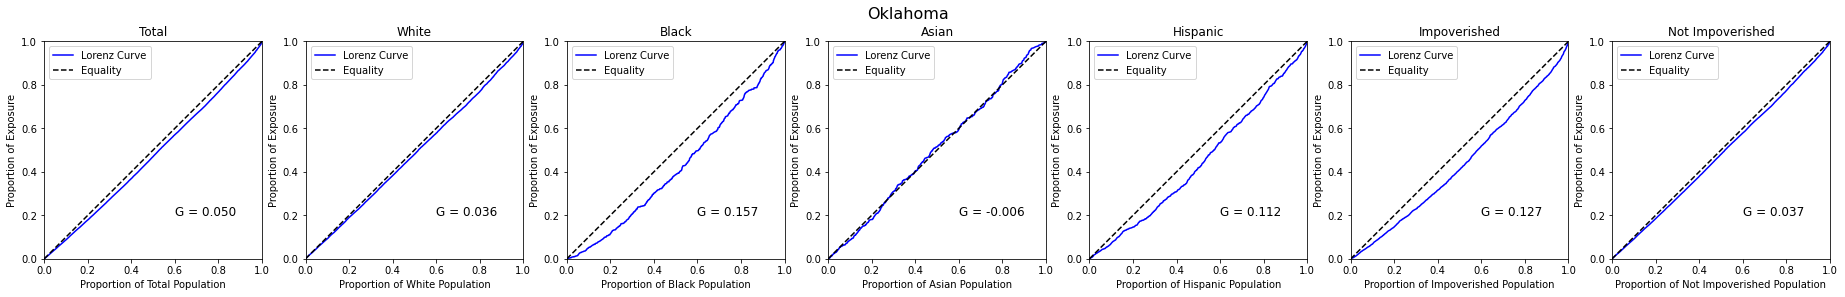

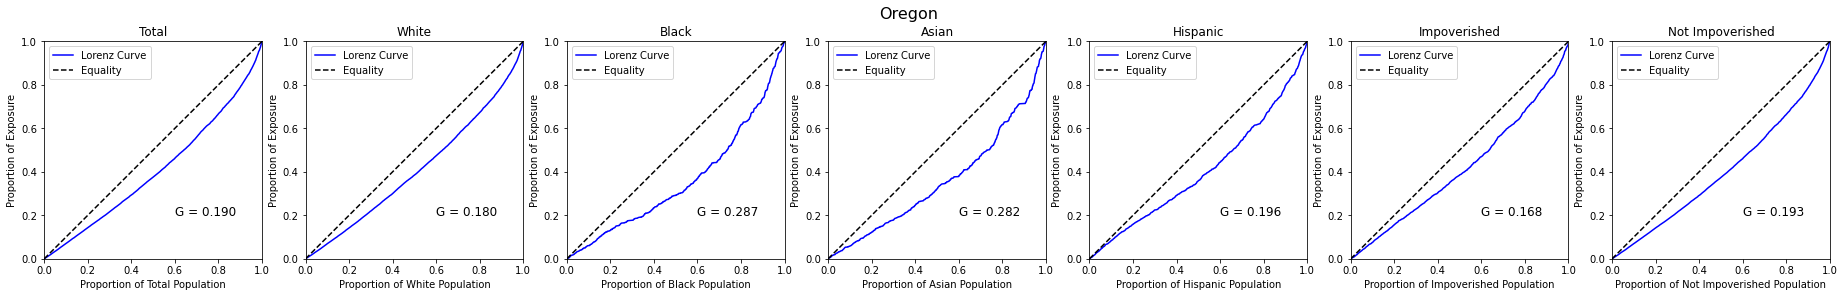

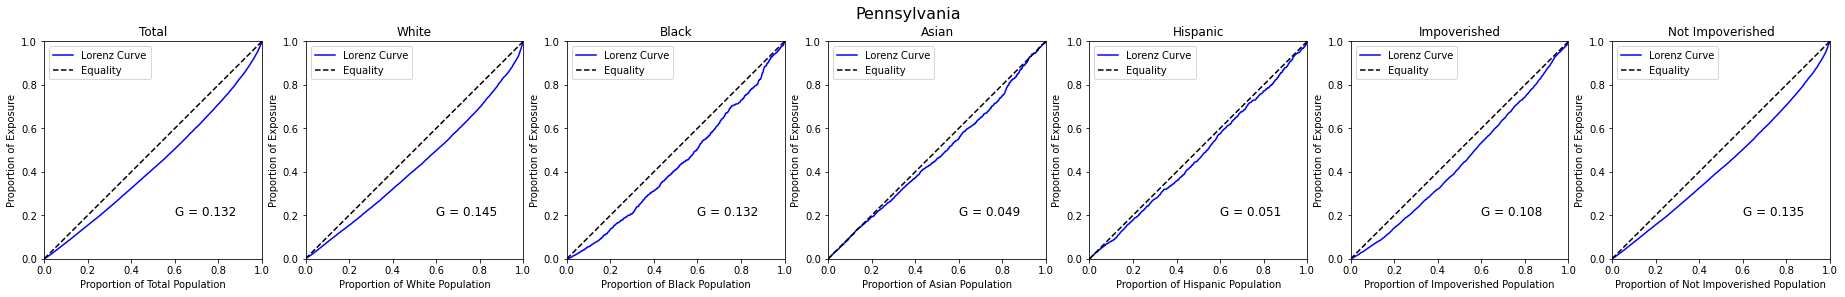

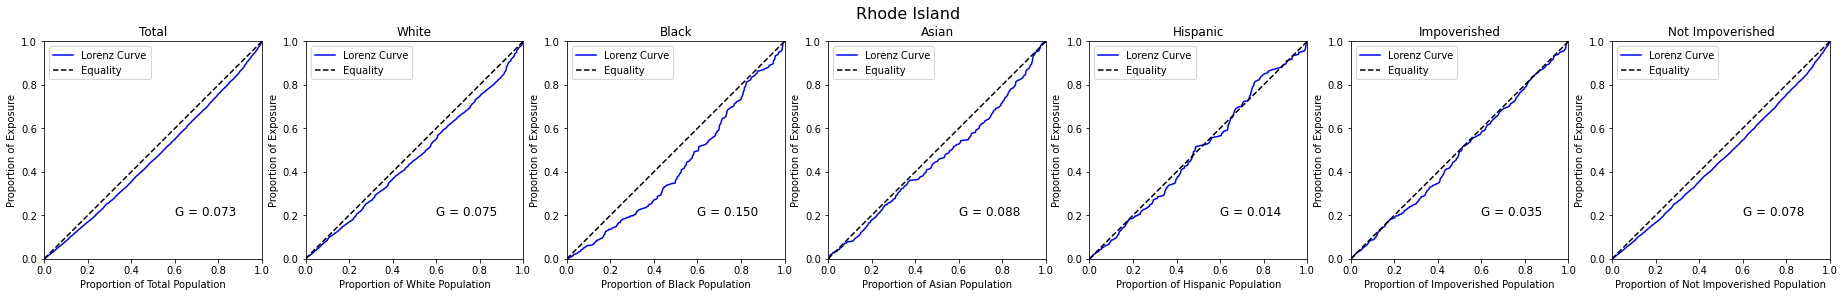

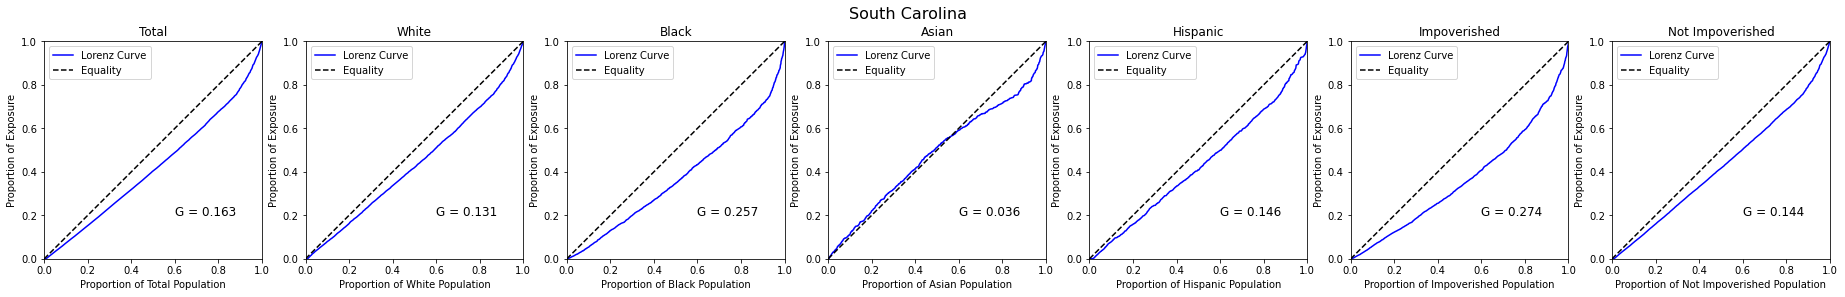

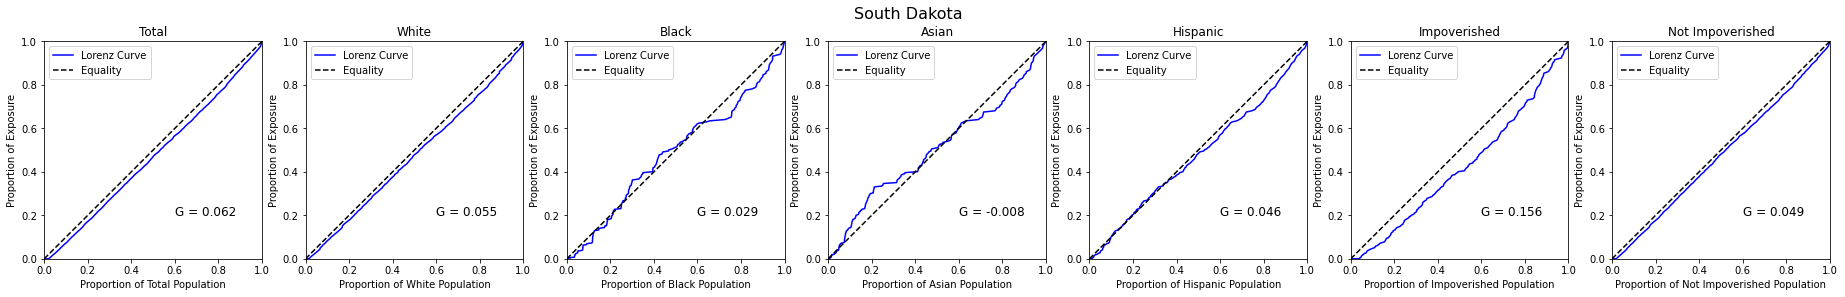

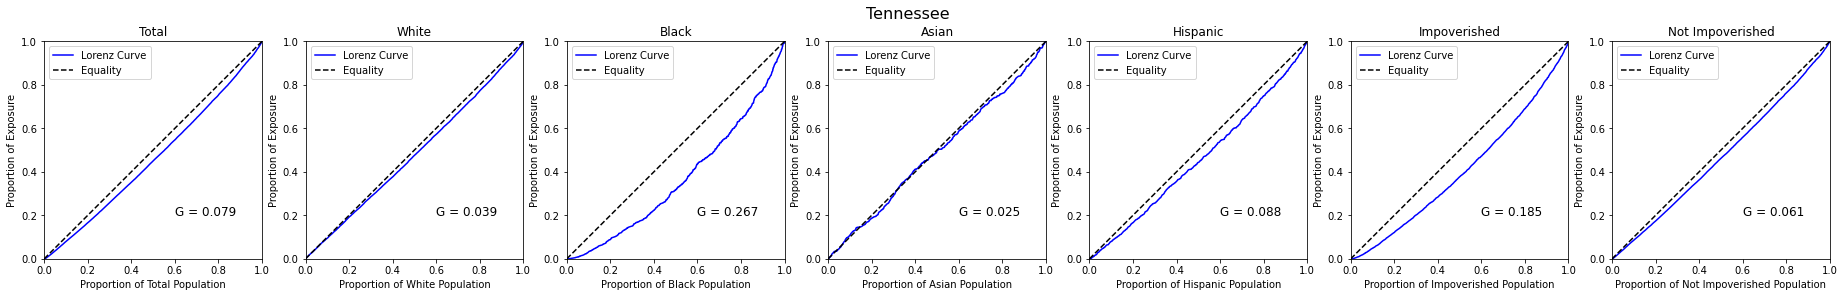

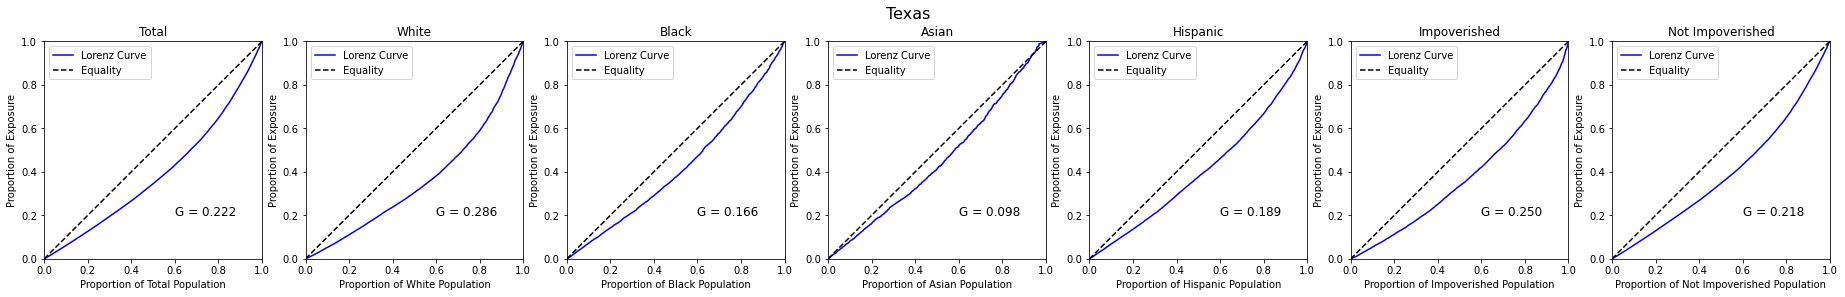

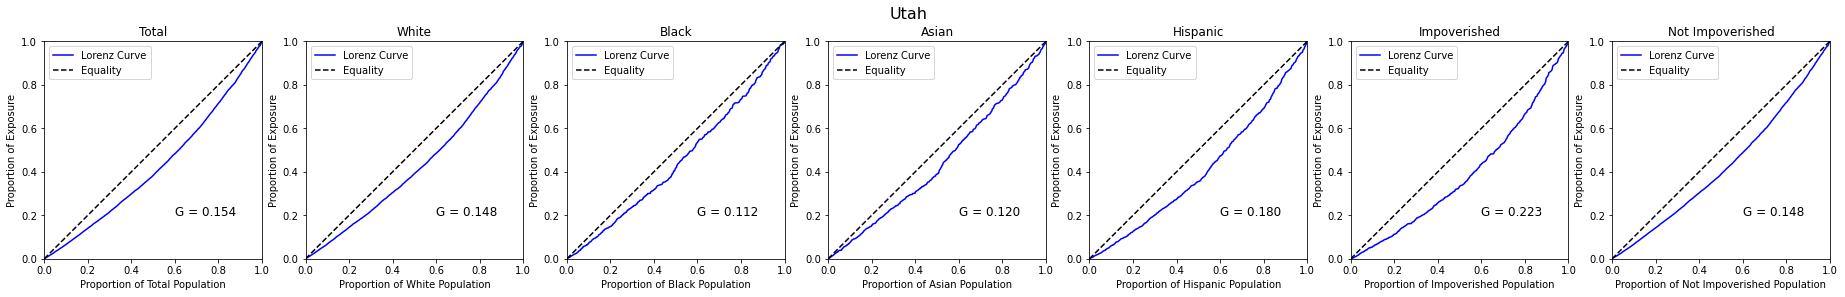

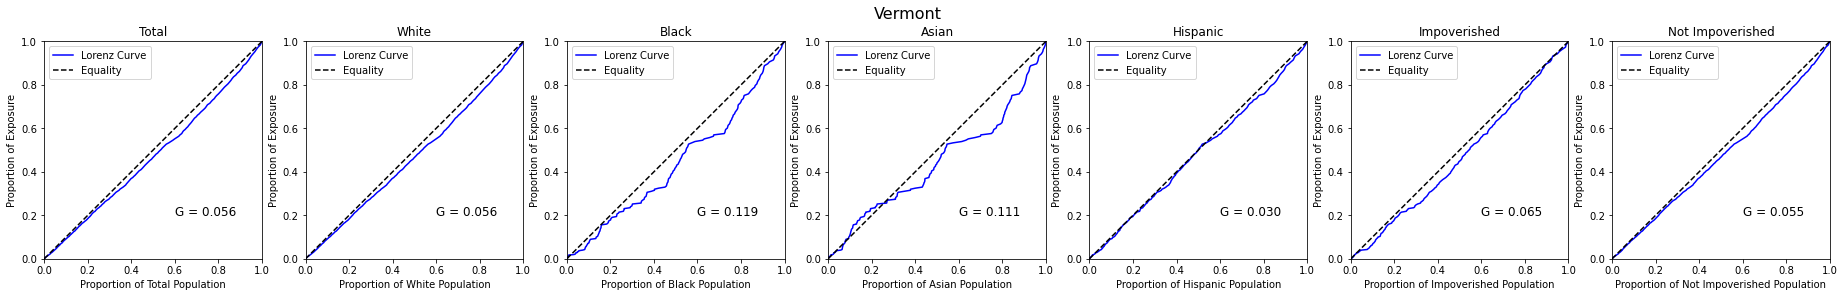

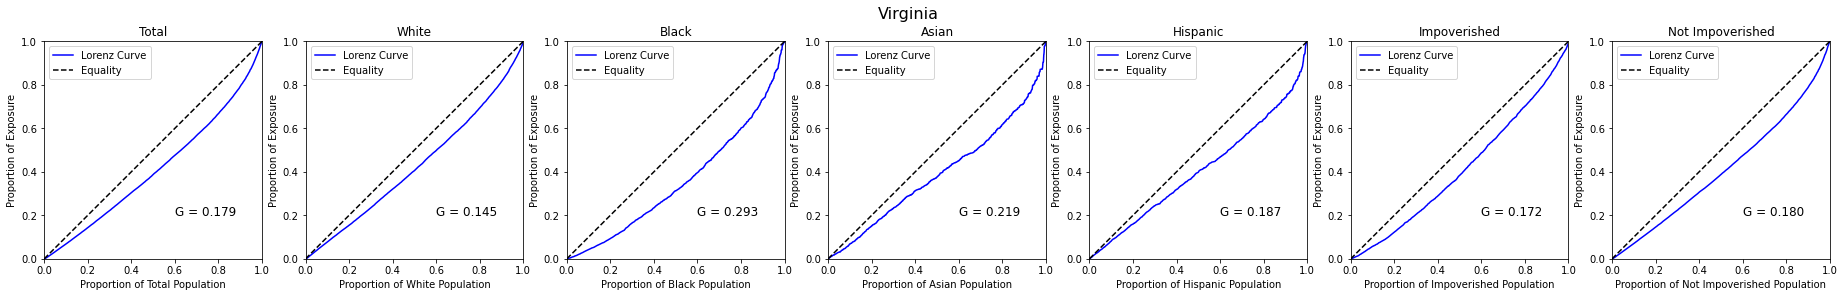

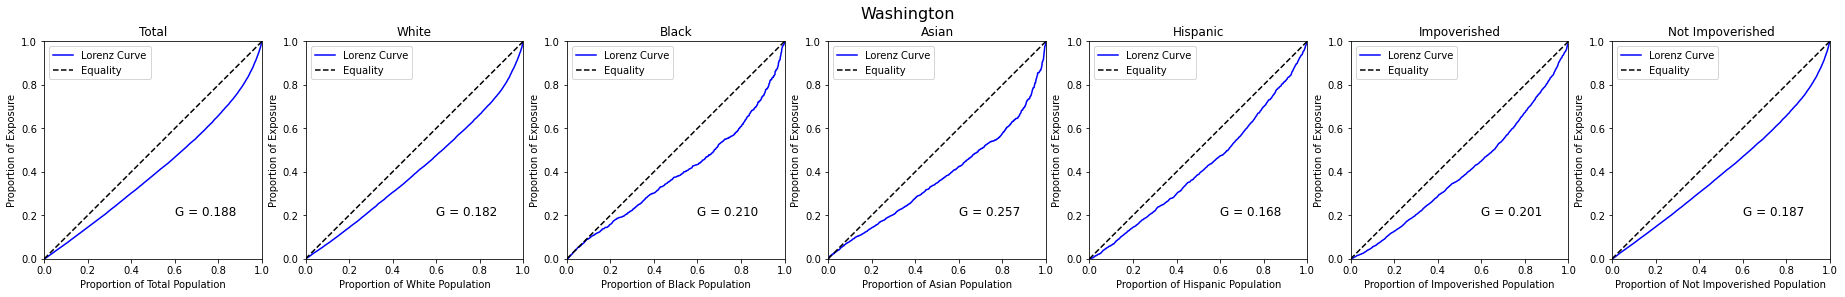

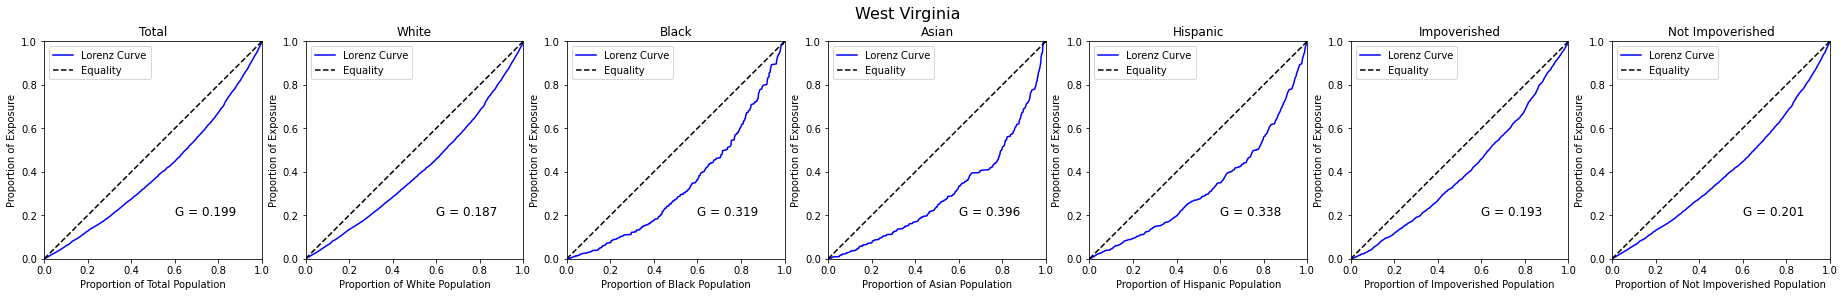

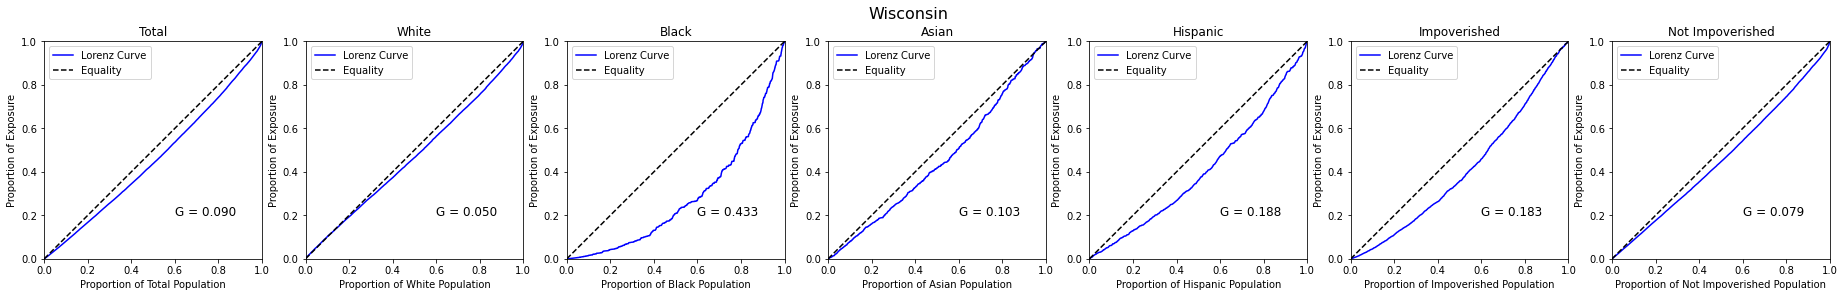

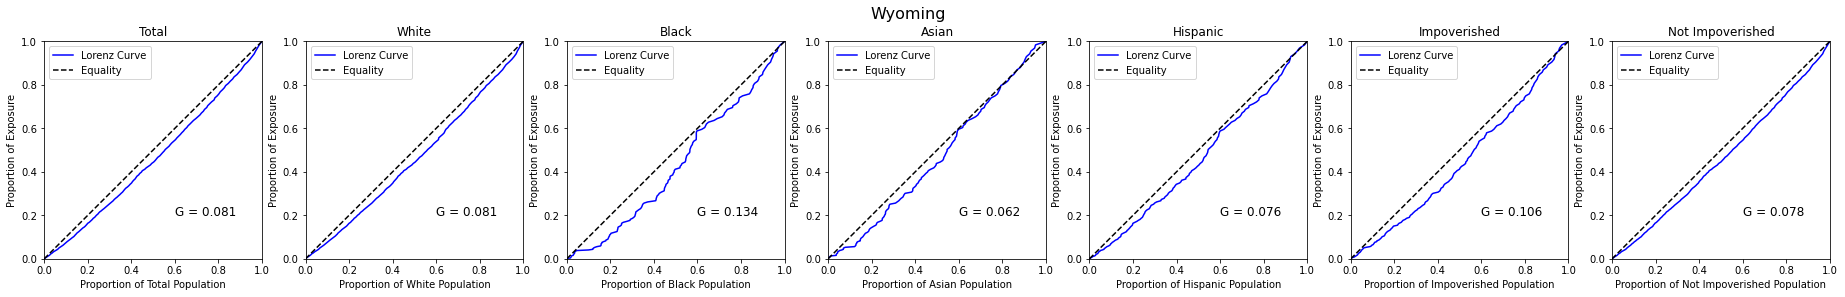

In [3]:
states = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    ffxpop_norm_med_total = np.median(df_state_total['normalized_ffxpop'])
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    ffxpop_med_white = np.median(df_state_white['ffxpop'])
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    ffxpop_med_black = np.median(df_state_black['ffxpop'])
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    ffxpop_med_asian = np.median(df_state_asian['ffxpop'])
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True)
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    ffxpop_med_hisp = np.median(df_state_hisp['ffxpop'])
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    ffxpop_med_pov = np.median(df_state_pov['ffxpop'])
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()
    ffxpop_med_notpov = np.median(df_state_notpov['ffxpop'])

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white = (0.5 - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/0.5
    Gini_black = (0.5 - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/0.5
    Gini_asian = (0.5 - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/0.5
    Gini_hisp = (0.5 - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/0.5
    Gini_pov = (0.5 - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/0.5
    Gini_notpov = (0.5 - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/0.5
    
    fig, ax = plt.subplots(1, 7, figsize=(32,4))
    fig.suptitle(i, y=1, fontsize=16)
    
    x = np.arange(0, 1.1, 0.1) # Equations to define eqaulity
    y = x
    
    ax[0].plot(df_state_total['normalized_pop'],df_state_total['normalized_ffxpop'],color='blue',linestyle='-')
    ax[0].plot(x, y, color='black',linestyle='--')
    ax[0].set_title('Total')
    ax[0].annotate('G = ''%.3f'%(Gini_total),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[0].set_xlim(0,1)
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel('Proportion of Total Population')
    ax[0].set_ylabel('Proportion of Exposure')
    ax[0].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[1].plot(df_state_white['normalized_pop'],df_state_white['normalized_ffxpop'],color='blue',linestyle='-')
    ax[1].plot(x, y, color='black',linestyle='--')
    ax[1].set_title('White')
    ax[1].annotate('G = ''%.3f'%(Gini_white),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)
    ax[1].set_xlabel('Proportion of White Population')
    ax[1].set_ylabel('Proportion of Exposure')
    ax[1].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[2].plot(df_state_black['normalized_pop'],df_state_black['normalized_ffxpop'],color='blue',linestyle='-')
    ax[2].plot(x, y, color='black',linestyle='--')
    ax[2].set_title('Black')
    ax[2].annotate('G = ''%.3f'%(Gini_black),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[2].set_xlim(0,1)
    ax[2].set_ylim(0,1)
    ax[2].set_xlabel('Proportion of Black Population')
    ax[2].set_ylabel('Proportion of Exposure')
    ax[2].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[3].plot(df_state_asian['normalized_pop'],df_state_asian['normalized_ffxpop'],color='blue',linestyle='-')
    ax[3].plot(x, y, color='black',linestyle='--')
    ax[3].set_title('Asian')
    ax[3].annotate('G = ''%.3f'%(Gini_asian),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[3].set_xlim(0,1)
    ax[3].set_ylim(0,1)
    ax[3].set_xlabel('Proportion of Asian Population')
    ax[3].set_ylabel('Proportion of Exposure')
    ax[3].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[4].plot(df_state_hisp['normalized_pop'],df_state_hisp['normalized_ffxpop'],color='blue',linestyle='-')
    ax[4].plot(x, y, color='black',linestyle='--')
    ax[4].set_title('Hispanic')
    ax[4].annotate('G = ''%.3f'%(Gini_hisp),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[4].set_xlim(0,1)
    ax[4].set_ylim(0,1)
    ax[4].set_xlabel('Proportion of Hispanic Population')
    ax[4].set_ylabel('Proportion of Exposure')
    ax[4].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[5].plot(df_state_pov['normalized_pop'],df_state_pov['normalized_ffxpop'],color='blue',linestyle='-')
    ax[5].plot(x, y, color='black',linestyle='--')
    ax[5].set_title('Impoverished')
    ax[5].annotate('G = ''%.3f'%(Gini_pov),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[5].set_xlim(0,1)
    ax[5].set_ylim(0,1)
    ax[5].set_xlabel('Proportion of Impoverished Population')
    ax[5].set_ylabel('Proportion of Exposure')
    ax[5].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[6].plot(df_state_notpov['normalized_pop'],df_state_notpov['normalized_ffxpop'],color='blue',linestyle='-')
    ax[6].plot(x, y, color='black',linestyle='--')
    ax[6].set_title('Not Impoverished')
    ax[6].annotate('G = ''%.3f'%(Gini_notpov),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[6].set_xlim(0,1)
    ax[6].set_ylim(0,1)
    ax[6].set_xlabel('Proportion of Not Impoverished Population')
    ax[6].set_ylabel('Proportion of Exposure')
    ax[6].legend(['Lorenz Curve','Equality'],loc=2)
    
    plt.savefig('State_Lorenz_Curves/'+i, dpi=300, bbox_inches='tight')

In [4]:
df = pd.read_csv('data/coastal_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                        NAME  pop_total  \
0     1  US01003010100   Census Tract 101, Baldwin County, Alabama     3745.0   
1     2  US01097000500      Census Tract 5, Mobile County, Alabama     1487.0   
2     3  US01097002700     Census Tract 27, Mobile County, Alabama     2251.0   
3     4  US01097004800     Census Tract 48, Mobile County, Alabama      979.0   
4     5  US01097003205  Census Tract 32.05, Mobile County, Alabama     2856.0   

   pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov    ff_ave  
0     2956.0      524.0        3.0      27.0    390.0      3355.0  2.620264  
1       10.0     1415.0        0.0      12.0    659.0       828.0  3.883049  
2      316.0     1815.0        4.0      41.0   1373.0       878.0  2.938244  
3       41.0      892.0        1.0       3.0    525.0       454.0  1.784360  
4      383.0     2069.0      185.0      90.0    809.0      2047.0  1.808333

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


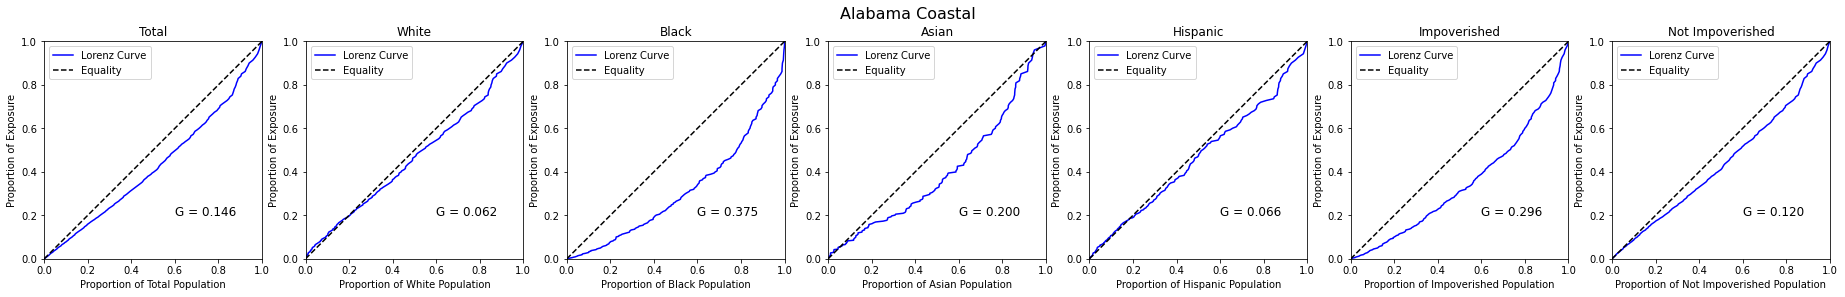

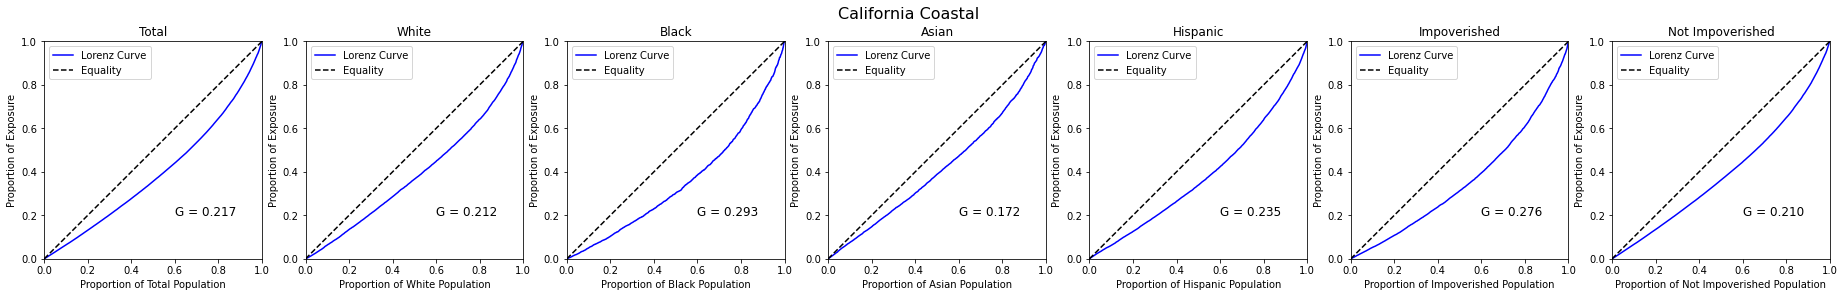

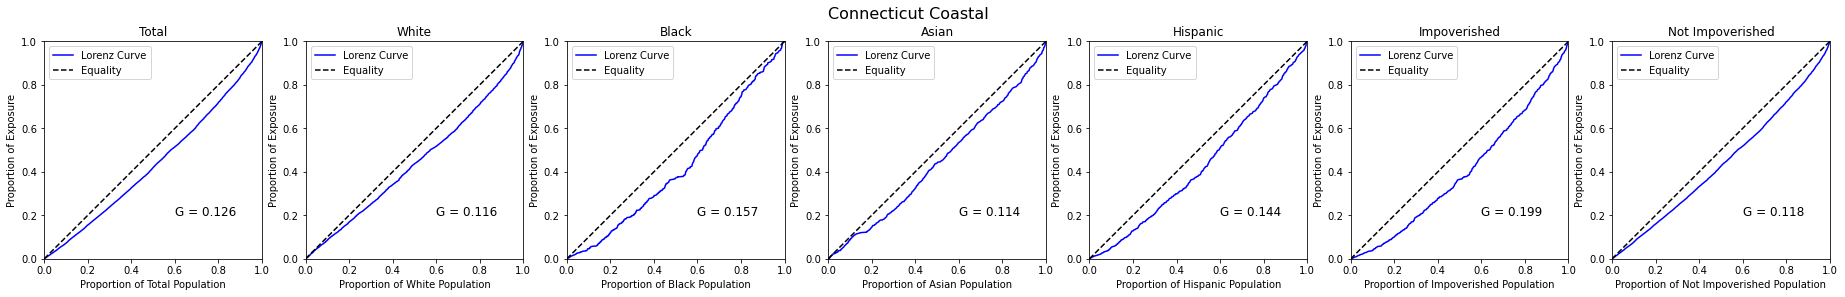

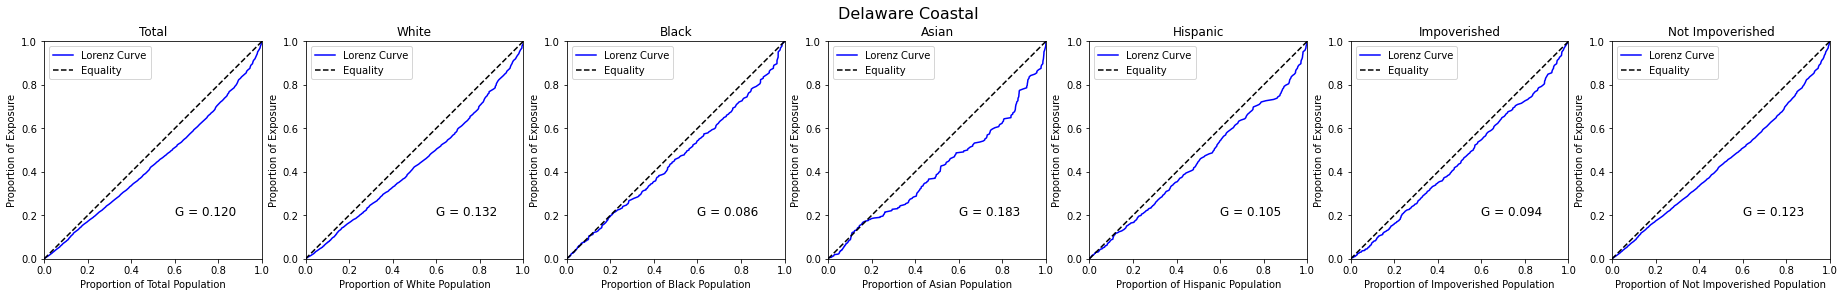

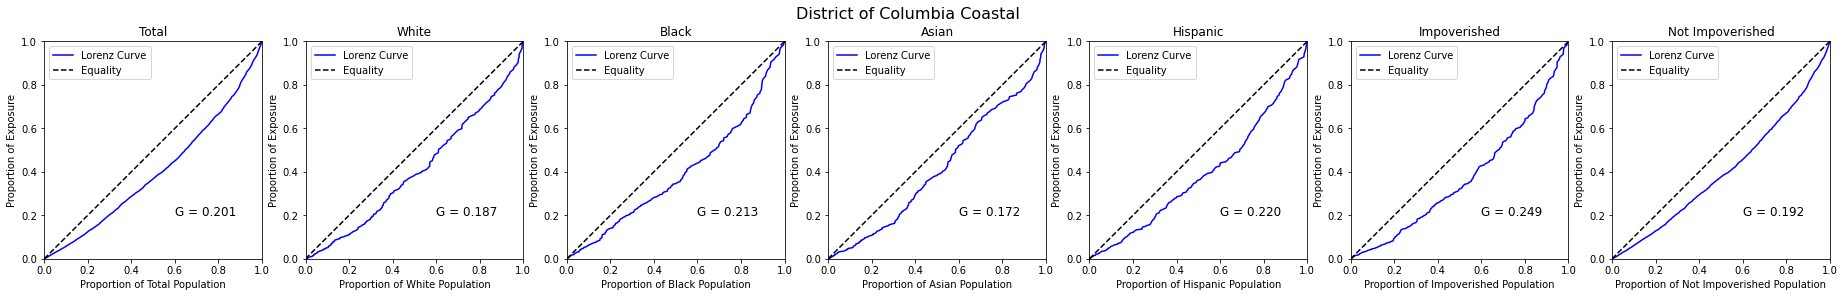

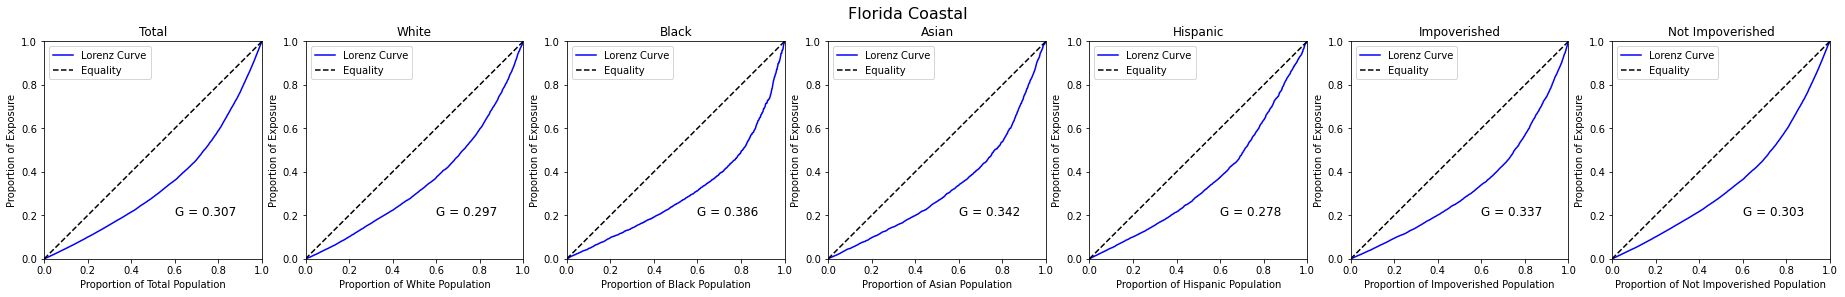

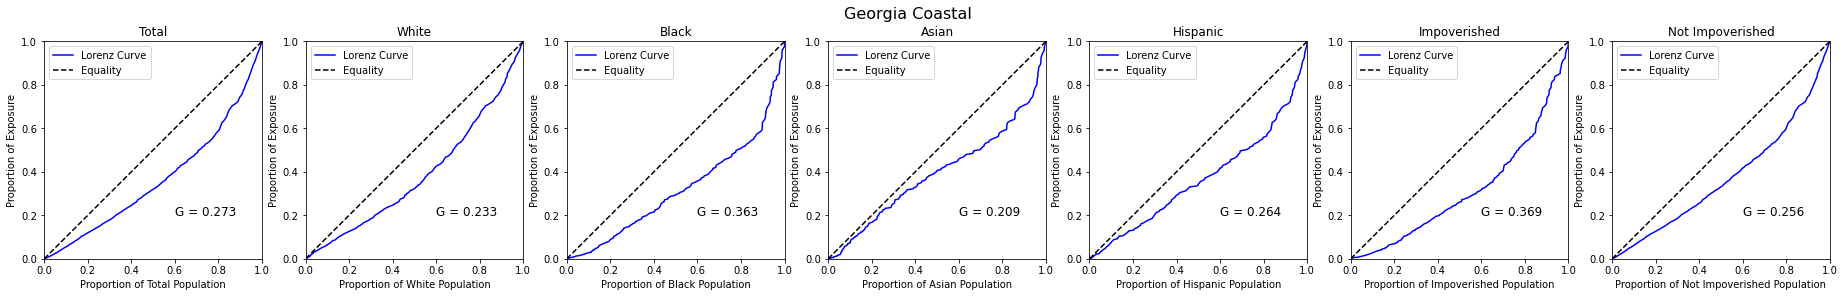

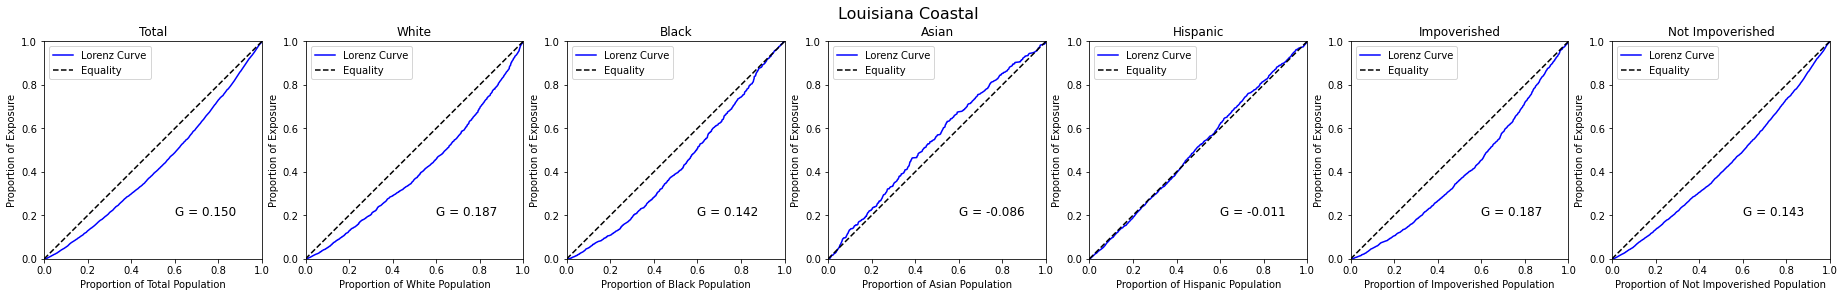

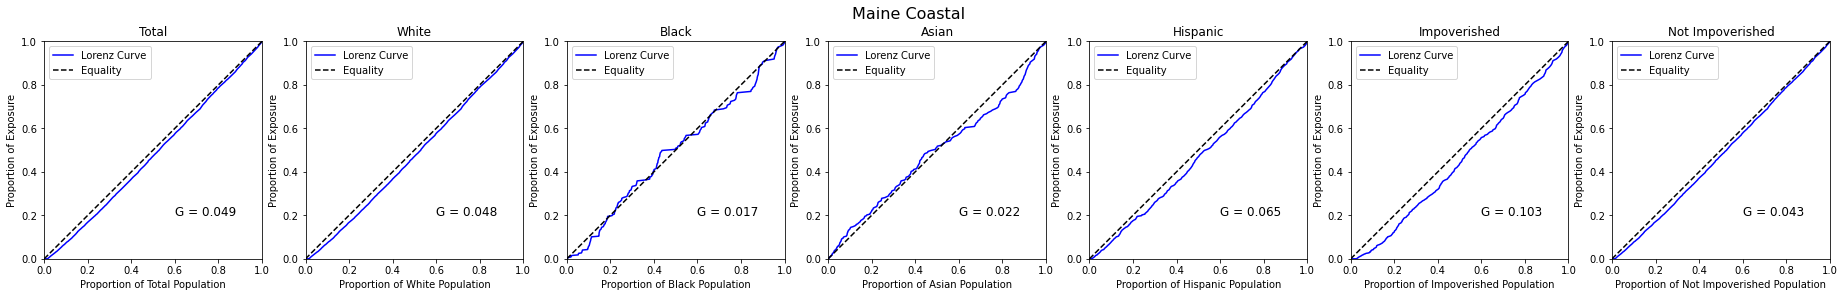

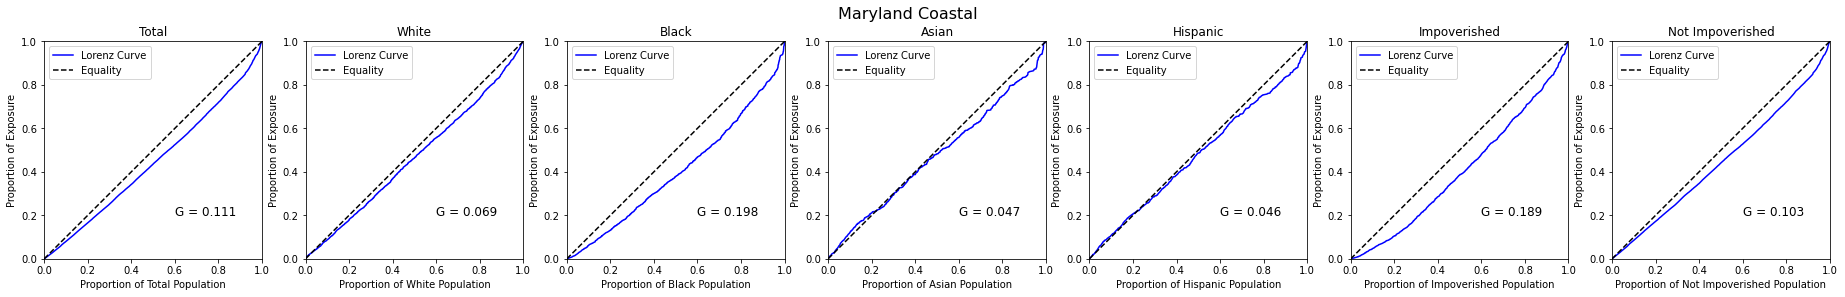

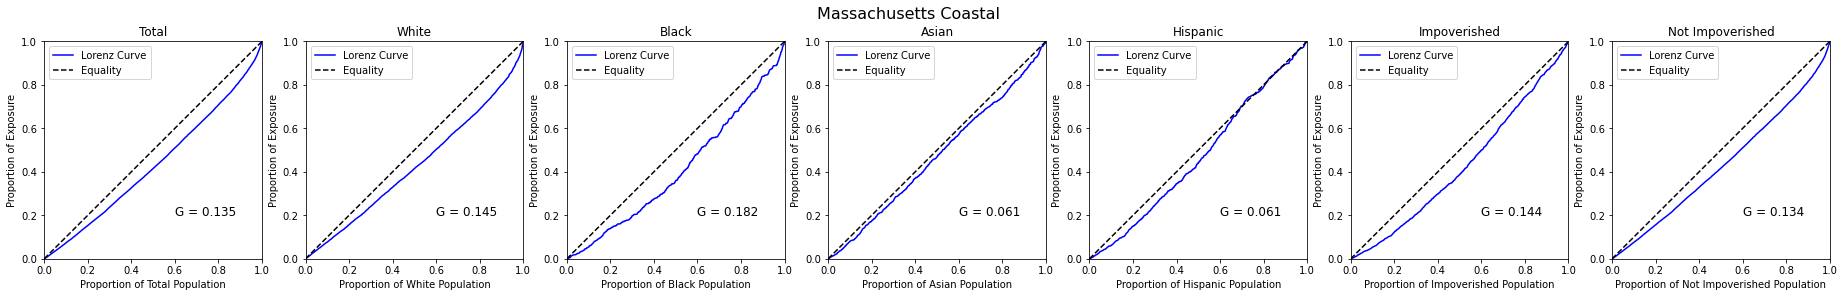

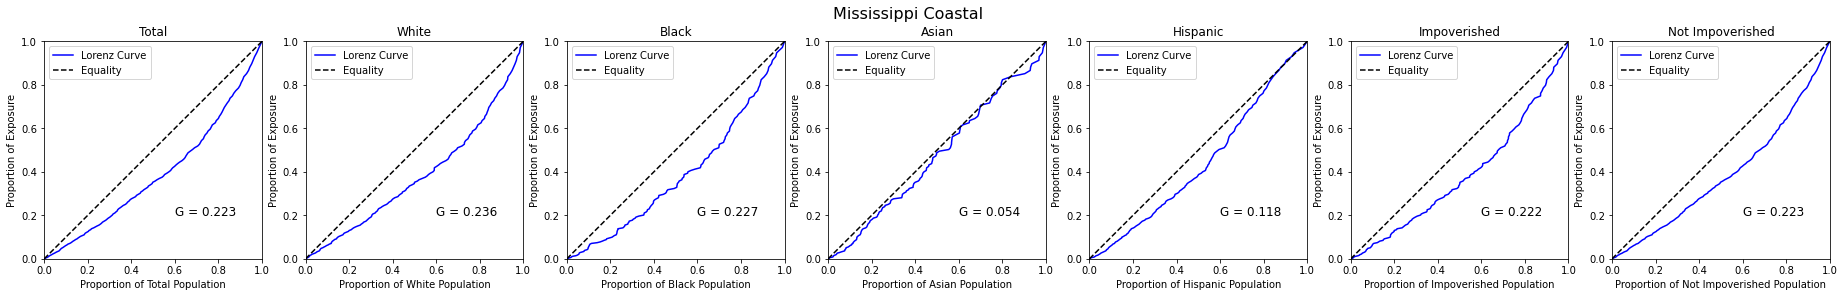

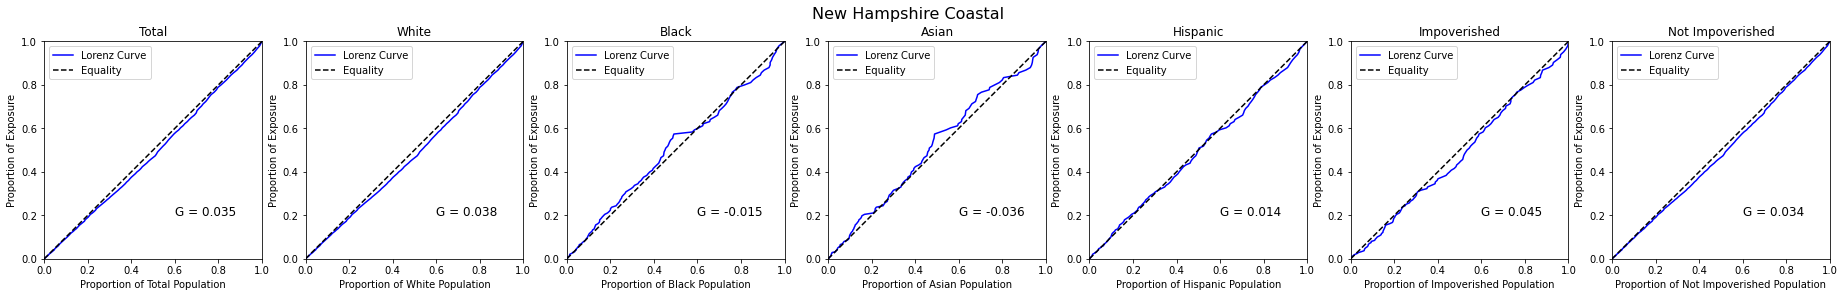

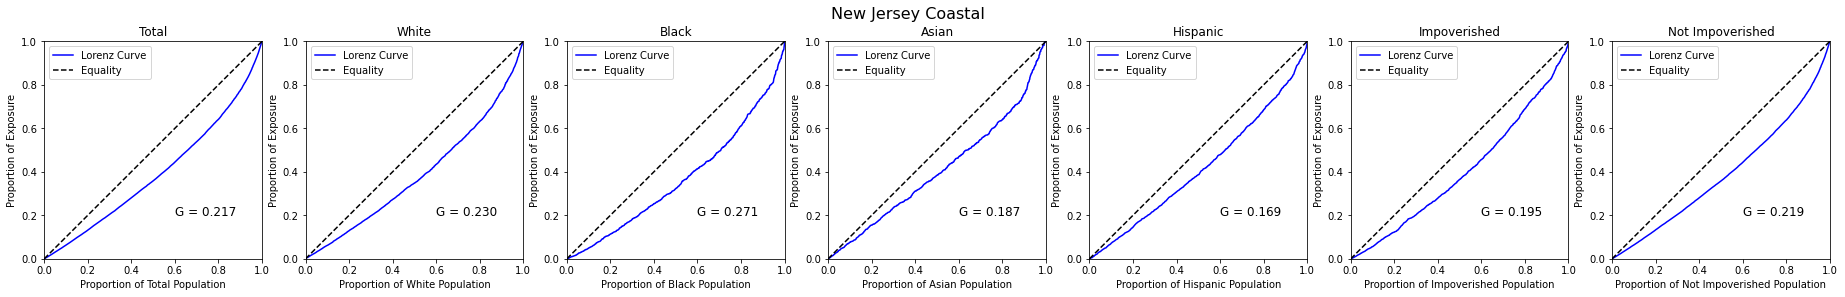

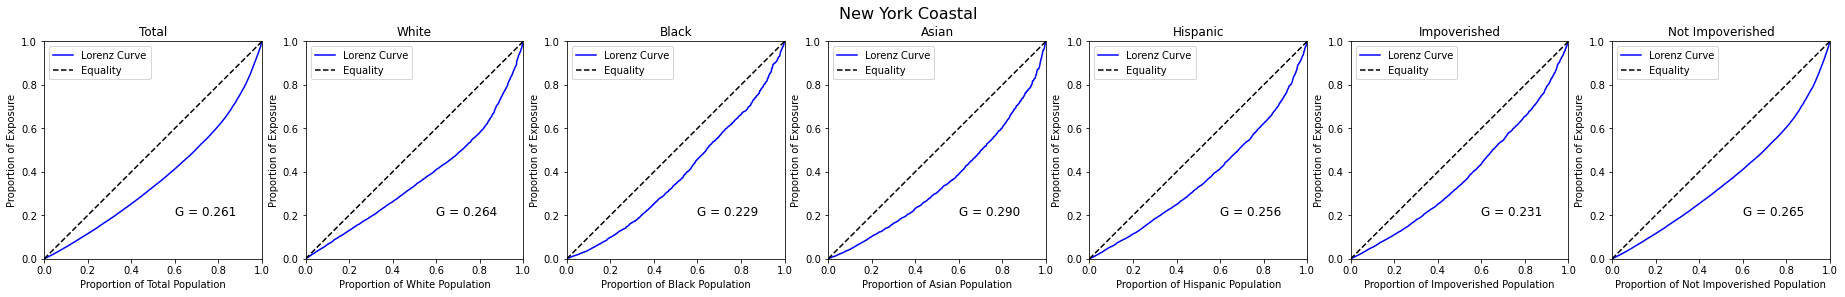

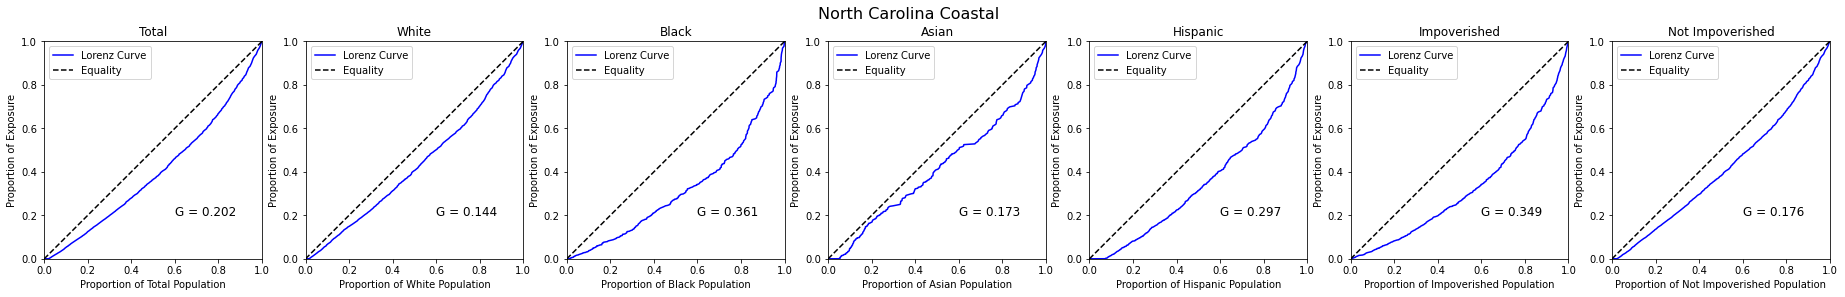

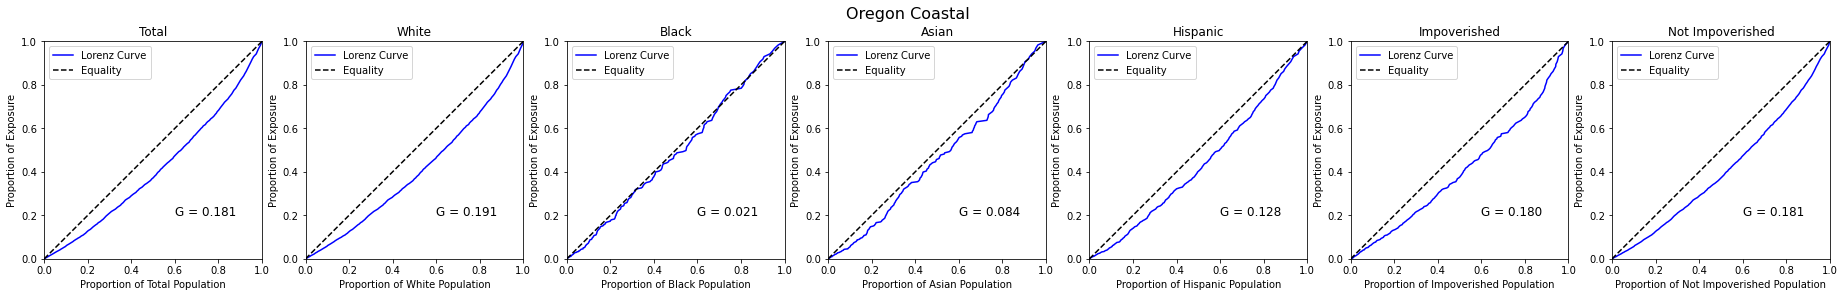

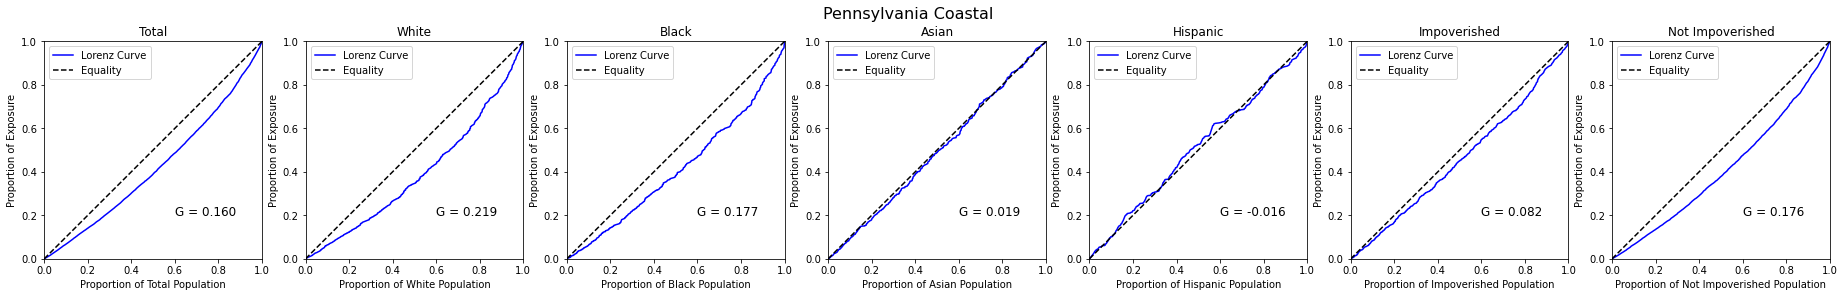

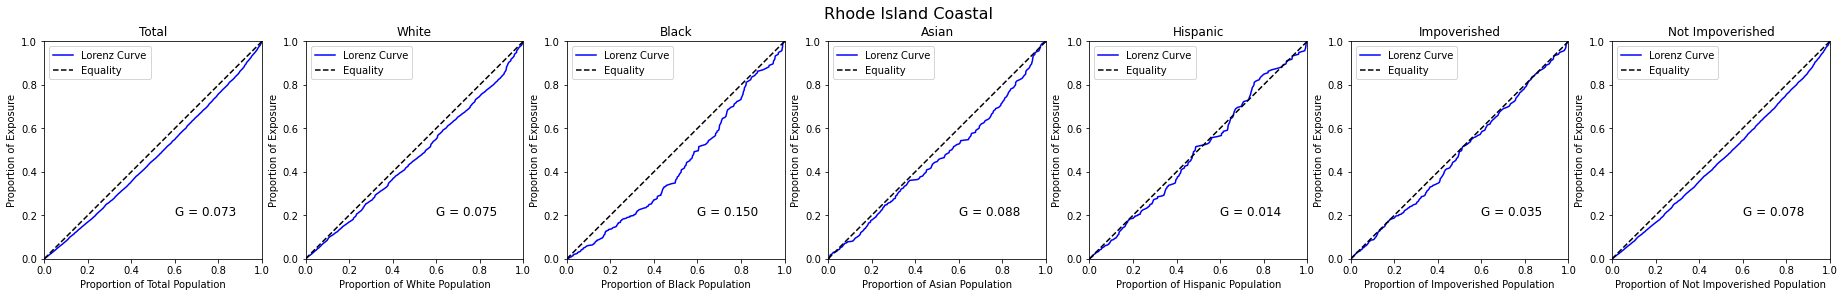

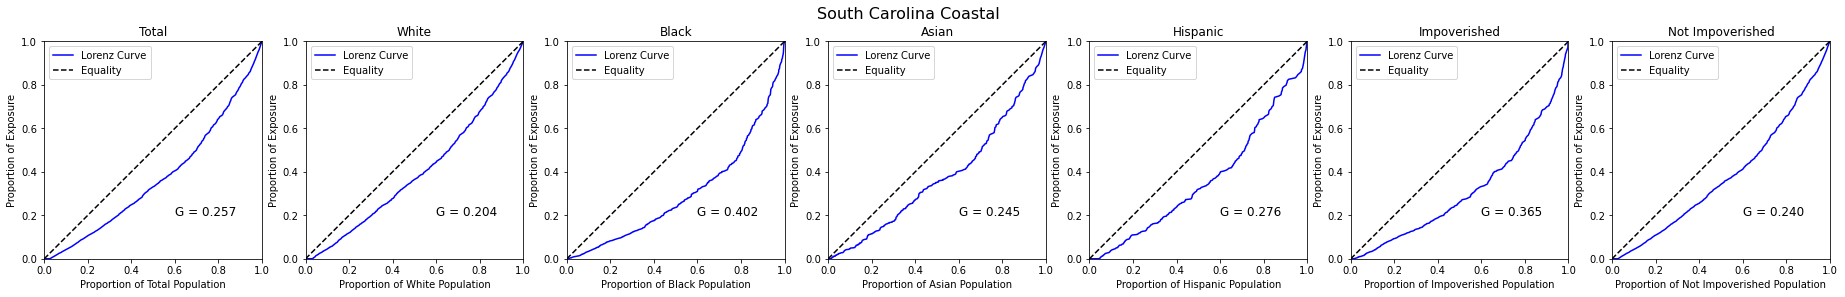

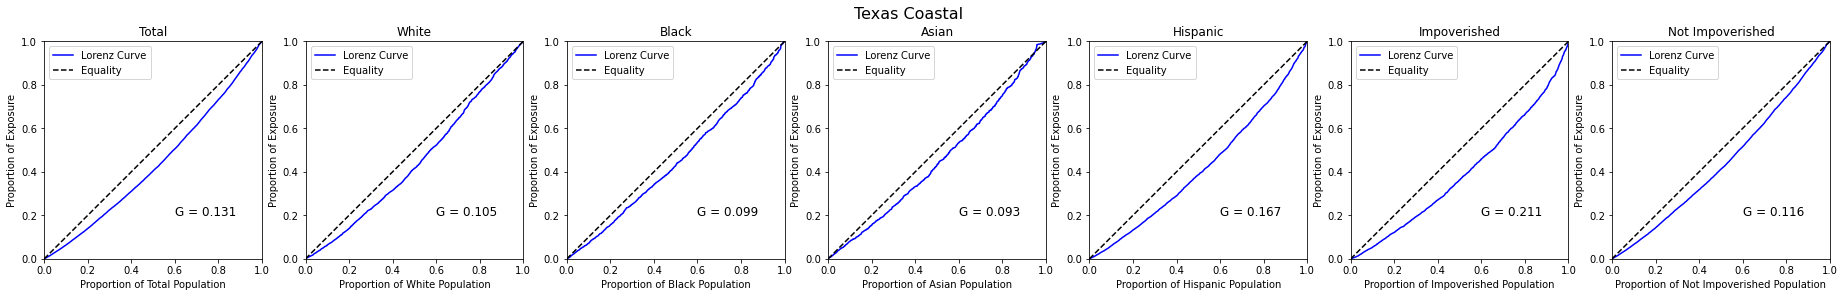

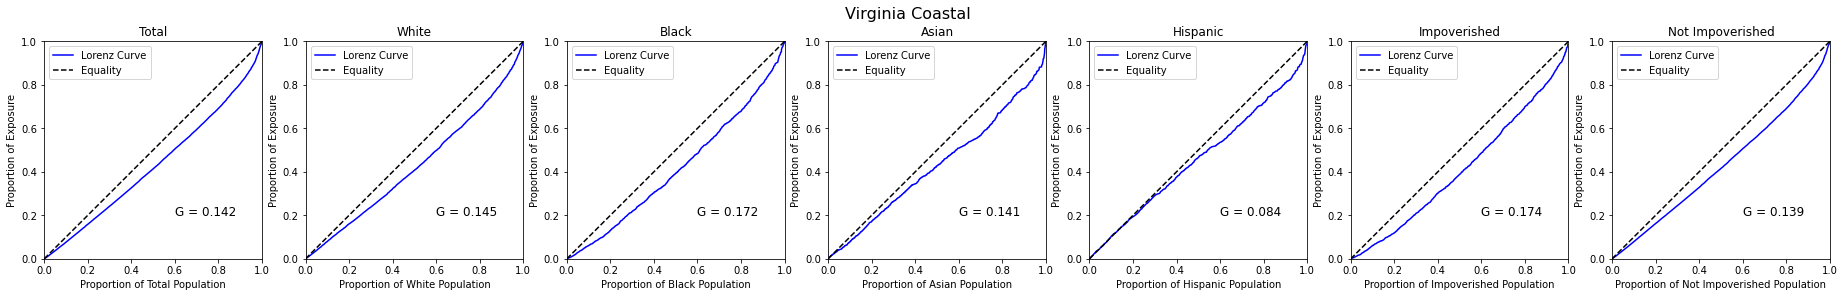

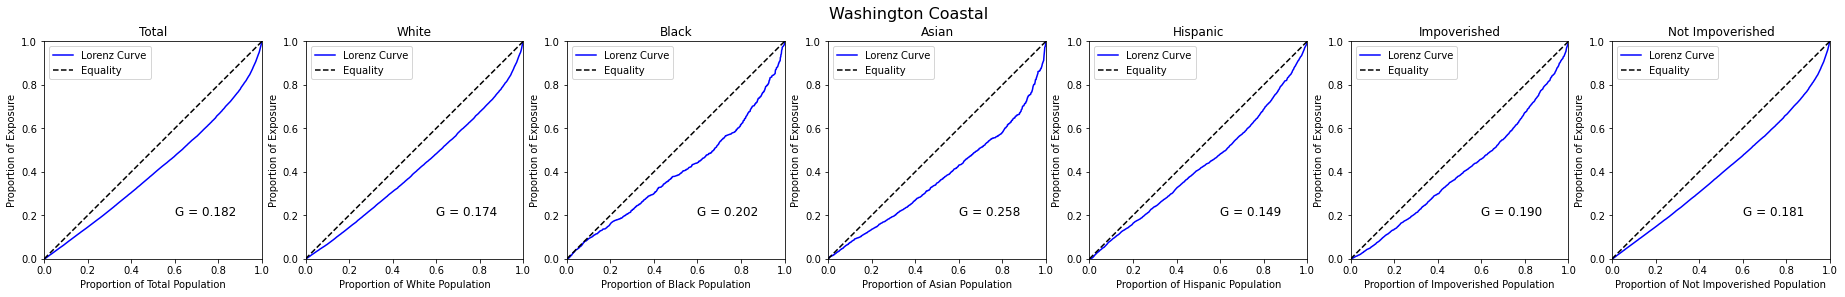

In [5]:
states = ['Alabama', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Virginia', 'Washington']

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True)
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white = (0.5 - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/0.5
    Gini_black = (0.5 - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/0.5
    Gini_asian = (0.5 - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/0.5
    Gini_hisp = (0.5 - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/0.5
    Gini_pov = (0.5 - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/0.5
    Gini_notpov = (0.5 - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/0.5
    
    fig, ax = plt.subplots(1, 7, figsize=(32,4))
    fig.suptitle(i+' Coastal', y=1, fontsize=16)
    
    x = np.arange(0, 1.1, 0.1) # Equations to define eqaulity
    y = x
    
    ax[0].plot(df_state_total['normalized_pop'],df_state_total['normalized_ffxpop'],color='blue',linestyle='-')
    ax[0].plot(x, y, color='black',linestyle='--')
    ax[0].set_title('Total')
    ax[0].annotate('G = ''%.3f'%(Gini_total),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[0].set_xlim(0,1)
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel('Proportion of Total Population')
    ax[0].set_ylabel('Proportion of Exposure')
    ax[0].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[1].plot(df_state_white['normalized_pop'],df_state_white['normalized_ffxpop'],color='blue',linestyle='-')
    ax[1].plot(x, y, color='black',linestyle='--')
    ax[1].set_title('White')
    ax[1].annotate('G = ''%.3f'%(Gini_white),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)
    ax[1].set_xlabel('Proportion of White Population')
    ax[1].set_ylabel('Proportion of Exposure')
    ax[1].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[2].plot(df_state_black['normalized_pop'],df_state_black['normalized_ffxpop'],color='blue',linestyle='-')
    ax[2].plot(x, y, color='black',linestyle='--')
    ax[2].set_title('Black')
    ax[2].annotate('G = ''%.3f'%(Gini_black),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[2].set_xlim(0,1)
    ax[2].set_ylim(0,1)
    ax[2].set_xlabel('Proportion of Black Population')
    ax[2].set_ylabel('Proportion of Exposure')
    ax[2].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[3].plot(df_state_asian['normalized_pop'],df_state_asian['normalized_ffxpop'],color='blue',linestyle='-')
    ax[3].plot(x, y, color='black',linestyle='--')
    ax[3].set_title('Asian')
    ax[3].annotate('G = ''%.3f'%(Gini_asian),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[3].set_xlim(0,1)
    ax[3].set_ylim(0,1)
    ax[3].set_xlabel('Proportion of Asian Population')
    ax[3].set_ylabel('Proportion of Exposure')
    ax[3].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[4].plot(df_state_hisp['normalized_pop'],df_state_hisp['normalized_ffxpop'],color='blue',linestyle='-')
    ax[4].plot(x, y, color='black',linestyle='--')
    ax[4].set_title('Hispanic')
    ax[4].annotate('G = ''%.3f'%(Gini_hisp),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[4].set_xlim(0,1)
    ax[4].set_ylim(0,1)
    ax[4].set_xlabel('Proportion of Hispanic Population')
    ax[4].set_ylabel('Proportion of Exposure')
    ax[4].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[5].plot(df_state_pov['normalized_pop'],df_state_pov['normalized_ffxpop'],color='blue',linestyle='-')
    ax[5].plot(x, y, color='black',linestyle='--')
    ax[5].set_title('Impoverished')
    ax[5].annotate('G = ''%.3f'%(Gini_pov),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[5].set_xlim(0,1)
    ax[5].set_ylim(0,1)
    ax[5].set_xlabel('Proportion of Impoverished Population')
    ax[5].set_ylabel('Proportion of Exposure')
    ax[5].legend(['Lorenz Curve','Equality'],loc=2)
    
    ax[6].plot(df_state_notpov['normalized_pop'],df_state_notpov['normalized_ffxpop'],color='blue',linestyle='-')
    ax[6].plot(x, y, color='black',linestyle='--')
    ax[6].set_title('Not Impoverished')
    ax[6].annotate('G = ''%.3f'%(Gini_notpov),
                xy=(0.6,0.2),
                xytext=(0.6,0.2),
                fontsize=12)
    ax[6].set_xlim(0,1)
    ax[6].set_ylim(0,1)
    ax[6].set_xlabel('Proportion of Not Impoverished Population')
    ax[6].set_ylabel('Proportion of Exposure')
    ax[6].legend(['Lorenz Curve','Equality'],loc=2)
    
    plt.savefig('Coastal_Lorenz_Curves/'+i+' Coastal', dpi=300, bbox_inches='tight')

# Modified Gini Indices

Modification of Gini index values by comparing demographic Lorenz curves to the total Lorenze curve for each state. These modified Gini indices can then be compared between states to compare inequity.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [7]:
df = pd.read_csv('data/contiguous_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                            NAME  \
0     0  US01089011021    Census Tract 110.21, Madison County, Alabama   
1     1  US01095031200      Census Tract 312, Marshall County, Alabama   
2     2  US01073012401  Census Tract 124.01, Jefferson County, Alabama   
3     3  US01073003400      Census Tract 34, Jefferson County, Alabama   
4     4  US01073010402  Census Tract 104.02, Jefferson County, Alabama   

   pop_total  pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov  \
0     5297.0     2762.0     1484.0      346.0     358.0     92.0      5205.0   
1     5727.0     4197.0       63.0       22.0    1089.0   1632.0      4095.0   
2     3660.0      208.0     3325.0        3.0      62.0    142.0      3518.0   
3     1955.0       74.0     1782.0        1.0      36.0    718.0      1237.0   
4     1982.0      337.0     1533.0        0.0      76.0    348.0      1634.0   

     ff_ave  
0  1.705615  
1  1.549508  
2  1.550605  
3  1.640357  
4  2.028916

In [19]:
states = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

df_State_Gini_mod = pd.DataFrame(columns=['State','Gini_total','Gini_white_mod','Gini_black_mod','Gini_asian_mod','Gini_hisp_mod','Gini_pov_mod','Gini_notpov_mod','p_white','p_black','p_asian','p_hisp','p_pov','p_notpov','ffxpop_med_total','ffxpop_med_white','ffxpop_med_black','ffxpop_med_asian','ffxpop_med_hisp','ffxpop_med_pov','ffxpop_med_notpov','Region','Color_plot'])

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    ffxpop_med_total = np.median(df_state_total['ffxpop'])
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    p_white = (df_state_white['pop_white'].sum()/df_state_white['pop_total'].sum())*100
    ffxpop_med_white = np.median(df_state_white['ffxpop'])
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    p_black = (df_state_black['pop_black'].sum()/df_state_black['pop_total'].sum())*100
    ffxpop_med_black = np.median(df_state_black['ffxpop'])
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    p_asian = (df_state_asian['pop_asian'].sum()/df_state_asian['pop_total'].sum())*100
    ffxpop_med_asian = np.median(df_state_asian['ffxpop'])
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    p_hisp = (df_state_hisp['pop_hisp'].sum()/df_state_hisp['pop_total'].sum())*100
    ffxpop_med_hisp = np.median(df_state_hisp['ffxpop'])
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    p_pov = (df_state_pov['pop_pov'].sum()/df_state_pov['pop_total'].sum())*100
    ffxpop_med_pov = np.median(df_state_pov['ffxpop'])
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()
    p_notpov = (df_state_notpov['pop_notpov'].sum()/df_state_notpov['pop_total'].sum())*100
    ffxpop_med_notpov = np.median(df_state_notpov['ffxpop'])

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_black_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_asian_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_hisp_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_pov_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_notpov_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    
    df_State_Gini_mod = df_State_Gini_mod.append({'State':i,'Gini_total':Gini_total,'Gini_white_mod':Gini_white_mod,'Gini_black_mod':Gini_black_mod,'Gini_asian_mod':Gini_asian_mod,'Gini_hisp_mod':Gini_hisp_mod,'Gini_pov_mod':Gini_pov_mod,'Gini_notpov_mod':Gini_notpov_mod,'p_white':p_white,'p_black':p_black,'p_asian':p_asian,'p_hisp':p_hisp,'p_pov':p_pov,'p_notpov':p_notpov,'ffxpop_med_total':ffxpop_med_total,'ffxpop_med_white':ffxpop_med_white,'ffxpop_med_black':ffxpop_med_black,'ffxpop_med_asian':ffxpop_med_asian,'ffxpop_med_hisp':ffxpop_med_hisp,'ffxpop_med_pov':ffxpop_med_pov,'ffxpop_med_notpov':ffxpop_med_notpov},ignore_index=True)

SyntaxError: invalid syntax (<ipython-input-19-a4df856acbe8>, line 55)

In [20]:
df = pd.read_csv('data/coastal_demographic2020.csv')
df = df.rename(columns={"white":"pop_white", "black":"pop_black","asian":"pop_asian","hisp":"pop_hisp"})
df = df.dropna()
df.head()

OID_          GEOID                                        NAME  pop_total  \
0     1  US01003010100   Census Tract 101, Baldwin County, Alabama     3745.0   
1     2  US01097000500      Census Tract 5, Mobile County, Alabama     1487.0   
2     3  US01097002700     Census Tract 27, Mobile County, Alabama     2251.0   
3     4  US01097004800     Census Tract 48, Mobile County, Alabama      979.0   
4     5  US01097003205  Census Tract 32.05, Mobile County, Alabama     2856.0   

   pop_white  pop_black  pop_asian  pop_hisp  pop_pov  pop_notpov    ff_ave  
0     2956.0      524.0        3.0      27.0    390.0      3355.0  2.620264  
1       10.0     1415.0        0.0      12.0    659.0       828.0  3.883049  
2      316.0     1815.0        4.0      41.0   1373.0       878.0  2.938244  
3       41.0      892.0        1.0       3.0    525.0       454.0  1.784360  
4      383.0     2069.0      185.0      90.0    809.0      2047.0  1.808333

In [21]:
states = ['Alabama', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Virginia', 'Washington']

df_Coastal_Gini_mod = pd.DataFrame(columns=['State_Coastal','Gini_total','Gini_white_mod','Gini_black_mod','Gini_asian_mod','Gini_hisp_mod','Gini_pov_mod','Gini_notpov_mod','p_white','p_black','p_asian','p_hisp','p_pov','p_notpov','ffxpop_med_total','ffxpop_med_white','ffxpop_med_black','ffxpop_med_asian','ffxpop_med_hisp','ffxpop_med_pov','ffxpop_med_notpov','Region','Color_plot'])

for i in states:
    df_state = df[df['NAME'].str.endswith(i)]
    
    df_state_total = df_state[['GEOID','NAME','pop_total','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_total['GEOID'], 'ffxpop':df_state_total['pop_total']*df_state_total['ff_ave']})
    df_state_total = pd.merge(left=df_state_total, right=ffxpop, how='outer')
    df_state_total = df_state_total.sort_values(by=['ffxpop'],ascending=True)
    df_state_total['cum_pop'] = df_state_total['pop_total'].cumsum()
    df_state_total['cum_ffxpop'] = df_state_total['ffxpop'].cumsum()
    df_state_total['normalized_pop'] = df_state_total['cum_pop']/df_state_total['pop_total'].sum()
    df_state_total['normalized_ffxpop'] = df_state_total['cum_ffxpop']/df_state_total['ffxpop'].sum()
    ffxpop_med_total = np.median(df_state_total['ffxpop'])
    
    df_state_white = df_state[['GEOID','NAME','pop_total','pop_white','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_white['GEOID'], 'ffxpop':df_state_white['pop_total']*df_state_white['ff_ave']})
    df_state_white = pd.merge(left=df_state_white, right=ffxpop, how='outer')
    df_state_white = df_state_white.sort_values(by=['ffxpop'],ascending=True)
    df_state_white['cum_pop'] = df_state_white['pop_white'].cumsum()
    df_state_white['cum_ffxpop'] = df_state_white['ffxpop'].cumsum()
    df_state_white['normalized_pop'] = df_state_white['cum_pop']/df_state_white['pop_white'].sum()
    df_state_white['normalized_ffxpop'] = df_state_white['cum_ffxpop']/df_state_white['ffxpop'].sum()
    p_white = (df_state_white['pop_white'].sum()/df_state_white['pop_total'].sum())*100
    ffxpop_med_white = np.median(df_state_white['ffxpop'])
    
    df_state_black = df_state[['GEOID','NAME','pop_total','pop_black','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_black['GEOID'], 'ffxpop':df_state_black['pop_total']*df_state_black['ff_ave']})
    df_state_black = pd.merge(left=df_state_black, right=ffxpop, how='outer')
    df_state_black = df_state_black.sort_values(by=['ffxpop'],ascending=True)
    df_state_black['cum_pop'] = df_state_black['pop_black'].cumsum()
    df_state_black['cum_ffxpop'] = df_state_black['ffxpop'].cumsum()
    df_state_black['normalized_pop'] = df_state_black['cum_pop']/df_state_black['pop_black'].sum()
    df_state_black['normalized_ffxpop'] = df_state_black['cum_ffxpop']/df_state_black['ffxpop'].sum()
    p_black = (df_state_black['pop_black'].sum()/df_state_black['pop_total'].sum())*100
    ffxpop_med_black = np.median(df_state_black['ffxpop'])
    
    df_state_asian = df_state[['GEOID','NAME','pop_total','pop_asian','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_asian['GEOID'], 'ffxpop':df_state_asian['pop_total']*df_state_asian['ff_ave']})
    df_state_asian = pd.merge(left=df_state_asian, right=ffxpop, how='outer')
    df_state_asian = df_state_asian.sort_values(by=['ffxpop'],ascending=True)
    df_state_asian['cum_pop'] = df_state_asian['pop_asian'].cumsum()
    df_state_asian['cum_ffxpop'] = df_state_asian['ffxpop'].cumsum()
    df_state_asian['normalized_pop'] = df_state_asian['cum_pop']/df_state_asian['pop_asian'].sum()
    df_state_asian['normalized_ffxpop'] = df_state_asian['cum_ffxpop']/df_state_asian['ffxpop'].sum()
    p_asian = (df_state_asian['pop_asian'].sum()/df_state_asian['pop_total'].sum())*100
    ffxpop_med_asian = np.median(df_state_asian['ffxpop'])
    
    df_state_hisp = df_state[['GEOID','NAME','pop_total','pop_hisp','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_hisp['GEOID'], 'ffxpop':df_state_hisp['pop_total']*df_state_hisp['ff_ave']})
    df_state_hisp = pd.merge(left=df_state_hisp, right=ffxpop, how='outer')
    df_state_hisp = df_state_hisp.sort_values(by=['ffxpop'],ascending=True)
    df_state_hisp['cum_pop'] = df_state_hisp['pop_hisp'].cumsum()
    df_state_hisp['cum_ffxpop'] = df_state_hisp['ffxpop'].cumsum()
    df_state_hisp['normalized_pop'] = df_state_hisp['cum_pop']/df_state_hisp['pop_hisp'].sum()
    df_state_hisp['normalized_ffxpop'] = df_state_hisp['cum_ffxpop']/df_state_hisp['ffxpop'].sum()
    p_hisp = (df_state_hisp['pop_hisp'].sum()/df_state_hisp['pop_total'].sum())*100
    ffxpop_med_hisp = np.median(df_state_hisp['ffxpop'])
    
    df_state_pov = df_state[['GEOID','NAME','pop_total','pop_pov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_pov['GEOID'], 'ffxpop':df_state_pov['pop_total']*df_state_pov['ff_ave']})
    df_state_pov = pd.merge(left=df_state_pov, right=ffxpop, how='outer')
    df_state_pov = df_state_pov.sort_values(by=['ffxpop'],ascending=True)
    df_state_pov['cum_pop'] = df_state_pov['pop_pov'].cumsum()
    df_state_pov['cum_ffxpop'] = df_state_pov['ffxpop'].cumsum()
    df_state_pov['normalized_pop'] = df_state_pov['cum_pop']/df_state_pov['pop_pov'].sum()
    df_state_pov['normalized_ffxpop'] = df_state_pov['cum_ffxpop']/df_state_pov['ffxpop'].sum()
    p_pov = (df_state_pov['pop_pov'].sum()/df_state_pov['pop_total'].sum())*100
    ffxpop_med_pov = np.median(df_state_pov['ffxpop'])
    
    df_state_notpov = df_state[['GEOID','NAME','pop_total','pop_notpov','ff_ave']]
    ffxpop = pd.DataFrame({'GEOID':df_state_notpov['GEOID'], 'ffxpop':df_state_notpov['pop_total']*df_state_notpov['ff_ave']})
    df_state_notpov = pd.merge(left=df_state_notpov, right=ffxpop, how='outer')
    df_state_notpov = df_state_notpov.sort_values(by=['ffxpop'],ascending=True)
    df_state_notpov['cum_pop'] = df_state_notpov['pop_notpov'].cumsum()
    df_state_notpov['cum_ffxpop'] = df_state_notpov['ffxpop'].cumsum()
    df_state_notpov['normalized_pop'] = df_state_notpov['cum_pop']/df_state_notpov['pop_notpov'].sum()
    df_state_notpov['normalized_ffxpop'] = df_state_notpov['cum_ffxpop']/df_state_notpov['ffxpop'].sum()
    p_notpov = (df_state_notpov['pop_notpov'].sum()/df_state_notpov['pop_total'].sum())*100
    ffxpop_med_notpov = np.median(df_state_notpov['ffxpop'])

    Gini_total = (0.5 - np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))/0.5
    Gini_white_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_white['normalized_ffxpop'],df_state_white['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_black_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_black['normalized_ffxpop'],df_state_black['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_asian_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_asian['normalized_ffxpop'],df_state_asian['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_hisp_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_hisp['normalized_ffxpop'],df_state_hisp['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_pov_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_pov['normalized_ffxpop'],df_state_pov['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    Gini_notpov_mod = (np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']) - np.trapz(df_state_notpov['normalized_ffxpop'],df_state_notpov['normalized_pop']))/(np.trapz(df_state_total['normalized_ffxpop'],df_state_total['normalized_pop']))
    
    df_Coastal_Gini_mod = df_Coastal_Gini_mod.append({'State_Coastal':i,'Gini_total':Gini_total,'Gini_white_mod':Gini_white_mod,'Gini_black_mod':Gini_black_mod,'Gini_asian_mod':Gini_asian_mod,'Gini_hisp_mod':Gini_hisp_mod,'Gini_pov_mod':Gini_pov_mod,'Gini_notpov_mod':Gini_notpov_mod,'p_white':p_white,'p_black':p_black,'p_asian':p_asian,'p_hisp':p_hisp,'p_pov':p_pov,'p_notpov':p_notpov,'ffxpop_med_total':ffxpop_med_total,'ffxpop_med_white':ffxpop_med_white,'ffxpop_med_black':ffxpop_med_black,'ffxpop_med_asian':ffxpop_med_asian,'ffxpop_med_hisp':ffxpop_med_hisp,'ffxpop_med_pov':ffxpop_med_pov,'ffxpop_med_notpov':ffxpop_med_notpov},ignore_index=True)

In [22]:
northeast = ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont','New Jersey','New York','Pennsylvania']
midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota']
south = ['Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']
west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','California','Oregon','Washington']

df_State_Gini_mod['Region'] = np.where(df_State_Gini_mod['State'].isin(northeast),'Northeast',np.where(df_State_Gini_mod['State'].isin(midwest),'Midwest',np.where(df_State_Gini_mod['State'].isin(south),'South','West')))
df_Coastal_Gini_mod['Region'] = np.where(df_Coastal_Gini_mod['State_Coastal'].isin(northeast),'Northeast',np.where(df_Coastal_Gini_mod['State_Coastal'].isin(midwest),'Midwest',np.where(df_Coastal_Gini_mod['State_Coastal'].isin(south),'South','West')))
df_State_Gini_mod['Color_plot'] = np.where(df_State_Gini_mod['State'].isin(northeast),'Navy',np.where(df_State_Gini_mod['State'].isin(midwest),'Gold',np.where(df_State_Gini_mod['State'].isin(south),'Orangered','Forestgreen')))
df_Coastal_Gini_mod['Color_plot'] = np.where(df_Coastal_Gini_mod['State_Coastal'].isin(northeast),'Navy',np.where(df_Coastal_Gini_mod['State_Coastal'].isin(midwest),'Gold',np.where(df_Coastal_Gini_mod['State_Coastal'].isin(south),'Orangered','Forestgreen')))

NameError: name 'df_State_Gini_mod' is not defined

In [ ]:
# State Modified Gini Indices Comparison
fig, ax = plt.subplots(6, 1, figsize=(8,48))
fig.subplots_adjust(right=0.8)

Color_List = list(df_State_Gini_mod['Color_plot'])
Region_List = list(df_State_Gini_mod['Region'])
Color_Set = set(Color_List)
Region_Set = set(Region_List)
Color_List = list(Color_Set)
Region_List = list(Region_Set)
R = []
for i in range(0,len(Color_List)):
    R.append(mpatches.Patch(color = Color_List[i],
                            alpha = 0.5,
                            label = Region_List[i]))
    
ax[0].scatter(
    x = df_State_Gini_mod['p_white'],
    y = df_State_Gini_mod['Gini_white_mod'],
    s = df_State_Gini_mod['ffxpop_med_white']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[0].plot([20,100], [0,0], color='black',linestyle='--')

ax[0].set_xlabel('Percent White (%)')
ax[0].set_ylabel('Modified Gini Index')

ax[0].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.83),
                       bbox_transform=fig.transFigure)

ax[1].scatter(
    x = df_State_Gini_mod['p_black'],
    y = df_State_Gini_mod['Gini_black_mod'],
    s = df_State_Gini_mod['ffxpop_med_black']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[1].plot([0,50], [0,0], color='black',linestyle='--')

ax[1].set_xlabel('Percent Black (%)')
ax[1].set_ylabel('Modified Gini Index')

ax[1].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.7),
                       bbox_transform=fig.transFigure)

ax[2].scatter(
    x = df_State_Gini_mod['p_asian'],
    y = df_State_Gini_mod['Gini_asian_mod'],
    s = df_State_Gini_mod['ffxpop_med_asian']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[2].plot([0,20], [0,0], color='black',linestyle='--')

ax[2].set_xlabel('Percent Asian (%)')
ax[2].set_ylabel('Modified Gini Index')

ax[2].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.57),
                       bbox_transform=fig.transFigure)

ax[3].scatter(
    x = df_State_Gini_mod['p_hisp'],
    y = df_State_Gini_mod['Gini_hisp_mod'],
    s = df_State_Gini_mod['ffxpop_med_hisp']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[3].plot([0,60], [0,0], color='black',linestyle='--')

ax[3].set_xlabel('Percent Hispanic (%)')
ax[3].set_ylabel('Modified Gini Index')

ax[3].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.44),
                       bbox_transform=fig.transFigure)

ax[4].scatter(
    x = df_State_Gini_mod['p_pov'],
    y = df_State_Gini_mod['Gini_pov_mod'],
    s = df_State_Gini_mod['ffxpop_med_pov']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[4].plot([0,20], [0,0], color='black',linestyle='--')

ax[4].set_xlabel('Percent Impoverished (%)')
ax[4].set_ylabel('Modified Gini Index')

ax[4].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.31),
                       bbox_transform=fig.transFigure)

ax[5].scatter(
    x = df_State_Gini_mod['p_notpov'],
    y = df_State_Gini_mod['Gini_notpov_mod'],
    s = df_State_Gini_mod['ffxpop_med_notpov']/25,
    c = df_State_Gini_mod['Color_plot'])
ax[5].plot([80,100], [0,0], color='black',linestyle='--')

ax[5].set_xlabel('Percent Not Impoverished (%)')
ax[5].set_ylabel('Modified Gini Index')

ax[5].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.18),
                       bbox_transform=fig.transFigure)

plt.savefig('State_Modified_Gini_Plots/State_Modified_Gini_Plots', dpi=300, bbox_inches='tight')

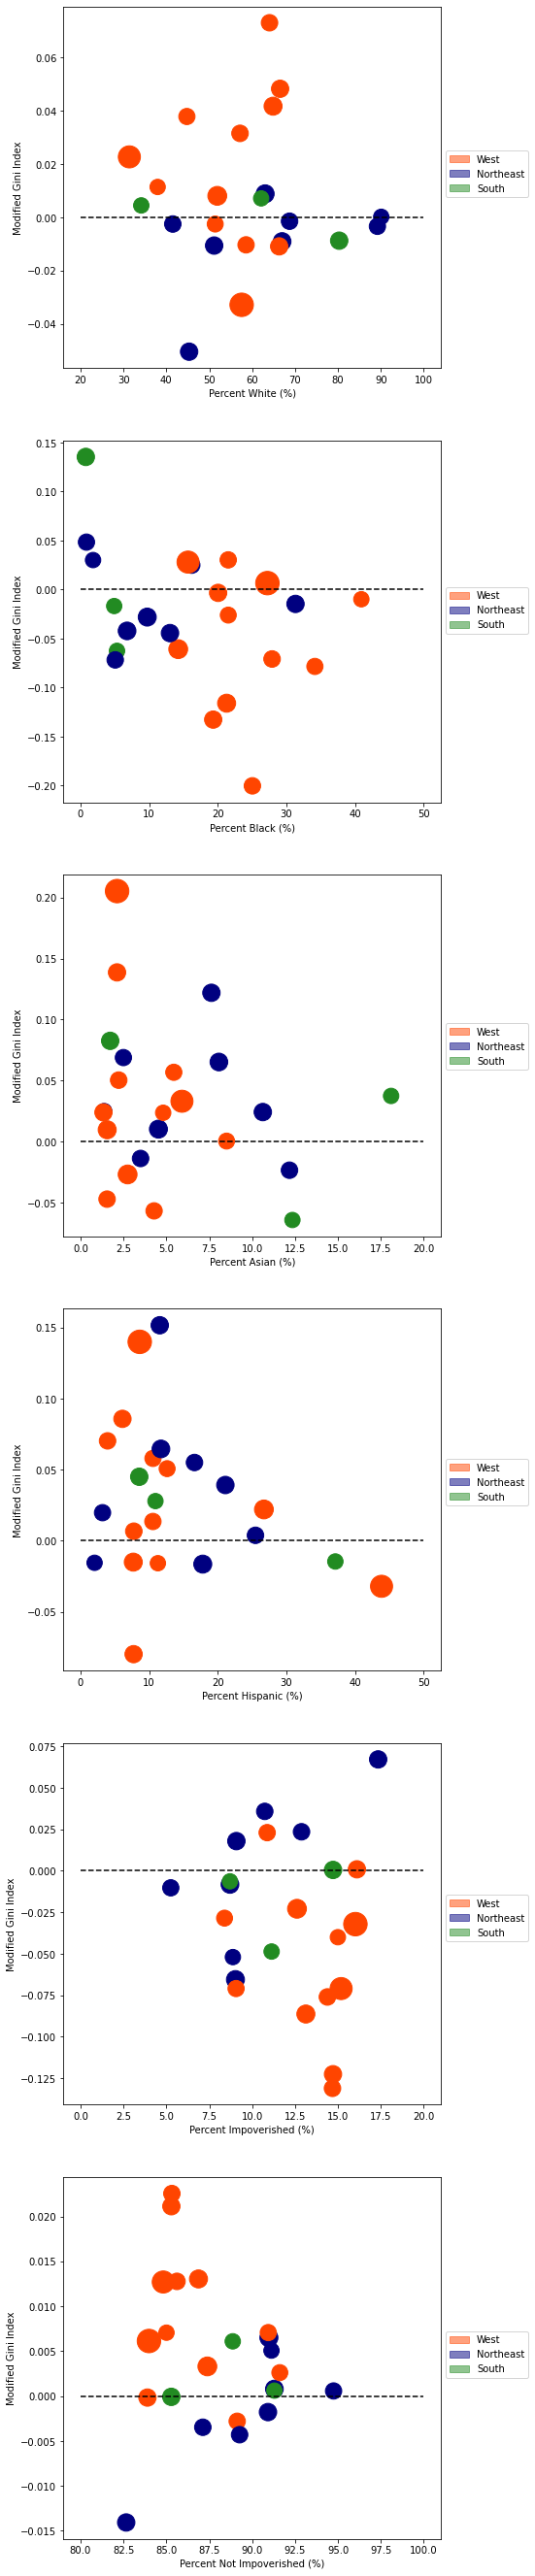

In [76]:
# Coastal Modified Gini Indices Comparison
fig, ax = plt.subplots(6, 1, figsize=(8,48))
fig.subplots_adjust(right=0.8)

Color_List = list(df_Coastal_Gini_mod['Color_plot'])
Region_List = list(df_Coastal_Gini_mod['Region'])
Color_Set = set(Color_List)
Region_Set = set(Region_List)
Color_List = list(Color_Set)
Region_List = list(Region_Set)
R = []
for i in range(0,len(Color_List)):
    R.append(mpatches.Patch(color = Color_List[i],
                            alpha = 0.5,
                            label = Region_List[i]))
    
ax[0].scatter(
    x = df_Coastal_Gini_mod['p_white'],
    y = df_Coastal_Gini_mod['Gini_white_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_white']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[0].plot([20,100], [0,0], color='black',linestyle='--')

ax[0].set_xlabel('Percent White (%)')
ax[0].set_ylabel('Modified Gini Index')

ax[0].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.83),
                       bbox_transform=fig.transFigure)

ax[1].scatter(
    x = df_Coastal_Gini_mod['p_black'],
    y = df_Coastal_Gini_mod['Gini_black_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_black']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[1].plot([0,50], [0,0], color='black',linestyle='--')

ax[1].set_xlabel('Percent Black (%)')
ax[1].set_ylabel('Modified Gini Index')

ax[1].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.7),
                       bbox_transform=fig.transFigure)

ax[2].scatter(
    x = df_Coastal_Gini_mod['p_asian'],
    y = df_Coastal_Gini_mod['Gini_asian_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_asian']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[2].plot([0,20], [0,0], color='black',linestyle='--')

ax[2].set_xlabel('Percent Asian (%)')
ax[2].set_ylabel('Modified Gini Index')

ax[2].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.57),
                       bbox_transform=fig.transFigure)

ax[3].scatter(
    x = df_Coastal_Gini_mod['p_hisp'],
    y = df_Coastal_Gini_mod['Gini_hisp_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_hisp']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[3].plot([0,50], [0,0], color='black',linestyle='--')

ax[3].set_xlabel('Percent Hispanic (%)')
ax[3].set_ylabel('Modified Gini Index')

ax[3].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.44),
                       bbox_transform=fig.transFigure)

ax[4].scatter(
    x = df_Coastal_Gini_mod['p_pov'],
    y = df_Coastal_Gini_mod['Gini_pov_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_pov']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[4].plot([0,20], [0,0], color='black',linestyle='--')

ax[4].set_xlabel('Percent Impoverished (%)')
ax[4].set_ylabel('Modified Gini Index')

ax[4].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.31),
                       bbox_transform=fig.transFigure)

ax[5].scatter(
    x = df_Coastal_Gini_mod['p_notpov'],
    y = df_Coastal_Gini_mod['Gini_notpov_mod'],
    s = df_Coastal_Gini_mod['ffxpop_med_notpov']/25,
    c = df_Coastal_Gini_mod['Color_plot'])
ax[5].plot([80,100], [0,0], color='black',linestyle='--')

ax[5].set_xlabel('Percent Not Impoverished (%)')
ax[5].set_ylabel('Modified Gini Index')

ax[5].legend(handles=R,loc="center left",
                       bbox_to_anchor=(0.8, 0.18),
                       bbox_transform=fig.transFigure)

plt.savefig('Coastal_Modified_Gini_Plots/Coastal_Modified_Gini_Plots', dpi=300, bbox_inches='tight')